In [9]:
# Import packages


import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline


import sys
sys.path.insert(0, '/home/ec2-user/SageMaker/mymodule/')
from common_functions import psi
from common_functions import ks
from common_functions import data_vars
from impute_functions import impute_secure
from impute_functions import impute_unsecure
from impute_functions import impute_noappl
from impute_functions import setMax

# pd.set_option('mode.chained_assignment', None)
# pd.reset_option('mode.chained_assignment')
import _pickle as cpickle 

import boto3


In [10]:


#old s3_source_path='s3://mf-ml-ds/propensity_to_pay/Monthly_Validation/val_202009/'
YYYYMM = '202103'
bucket_name = 'mf-ml-ds'
s3_source = 's3://'+ bucket_name +'/propensity_to_pay/Monthly_Validation/val_'
s3_source_path  = s3_source + YYYYMM
s3_score_target  = 'propensity_to_pay/Monthly_Validation/val_' + YYYYMM +'/'
# pps_score_file_name = 'xgb_weighted_score_pot_' + YYYYMM +'.csv'

psi_file_path = 's3://'+ bucket_name + '/' + s3_score_target
model_path = 'propensity_to_pay/final_model/'

s3 = boto3.resource('s3')



In [11]:
def download_model(model_name):
    #model_name = 'slowsecure_xgb_model_w'
    s3.meta.client.download_file(bucket_name, model_path + model_name, model_name)
    with open(model_name, 'rb') as f:
        xgb = cpickle.load(f)
        return xgb
    

In [12]:
def upload_file(df_file, file_name):
    #psi_file_name = 'pot30_xgb_psi.xlsx'
    df_file.to_excel(file_name)
    s3.meta.client.upload_file(file_name, bucket_name , s3_score_target + file_name)

In [13]:
df_columns = pd.read_csv('pps_attributes.csv')

In [14]:
slowsecure_columns = df_columns[ df_columns['segment'] == 'slowsecure']['columns_name'].to_list()
slowunsecure_columns = df_columns[ df_columns['segment'] == 'slowunsecure']['columns_name'].to_list()
slownoappl_columns = df_columns[ df_columns['segment'] == 'slownoappl']['columns_name'].to_list()

In [15]:
#read in the csv oot  data
df=pd.read_csv(s3_source_path+'/secure.csv')

In [16]:
df1=df[slowsecure_columns]
df1.shape

(62134, 40)

In [17]:
#read in the csv oot  data
df=pd.read_csv(s3_source_path+'/unsecure.csv')

In [18]:

df2=df[slowunsecure_columns]
df2.shape

(335349, 39)

In [19]:
#read in the csv oot  data
df=pd.read_csv(s3_source_path+'/noappl.csv')


In [20]:

df3=df[slownoappl_columns]
df3.shape

(146840, 38)

# plot the slowsecure and compare with the development sample

In [21]:
import scorecardpy as sc
from matplotlib import rcParams

# rcParams['figure.figsize'] = 6.4 ,4.8
bins_adj = sc.woebin(df1, y="badflag")



[INFO] creating woe binning ...
Binning on 62134 rows and 40 columns in 00:00:14


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/scorecardpy/woebin.py:1203: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax1 = plt.subplots()
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/scorecardpy/woebin.py:1203: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax1 = plt.subplots()
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/scorecardpy/woebin.py:1203: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figu

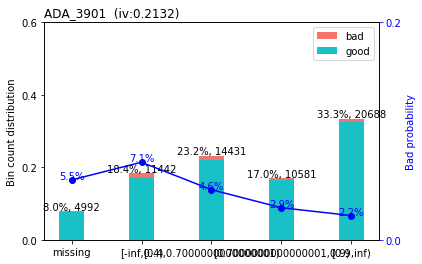

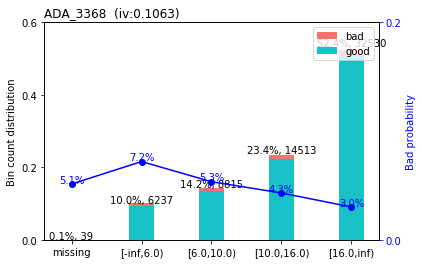

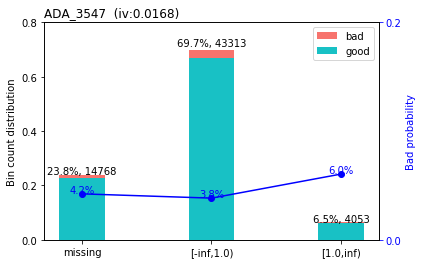

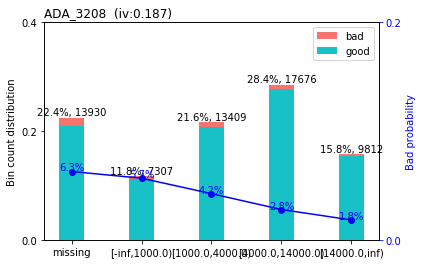

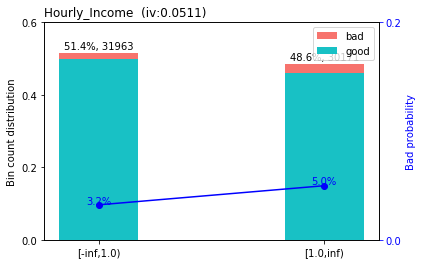

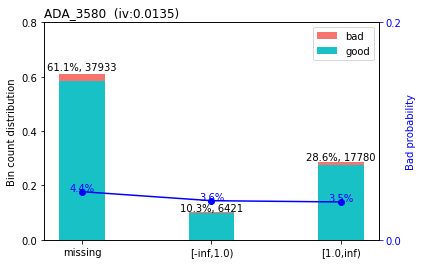

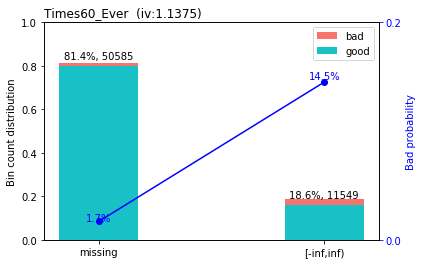

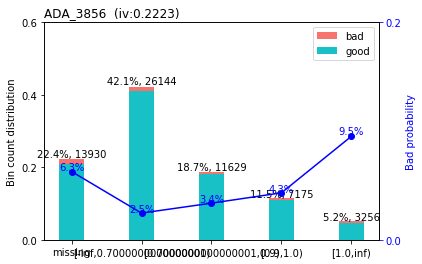

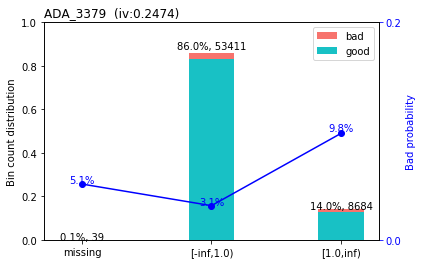

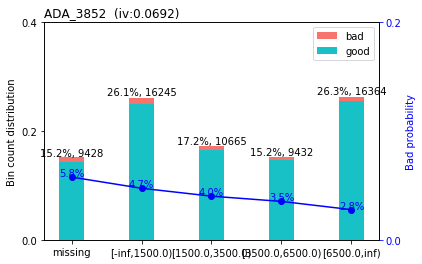

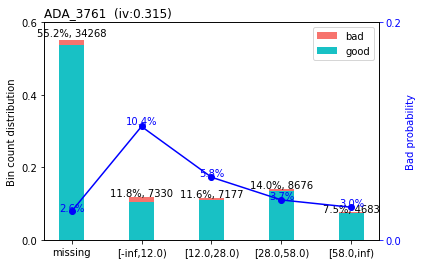

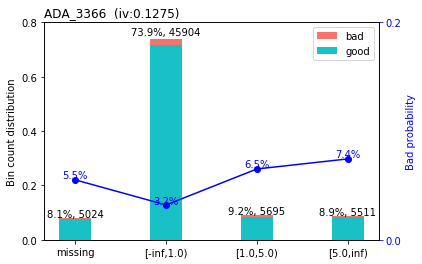

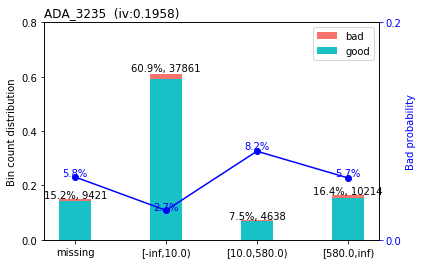

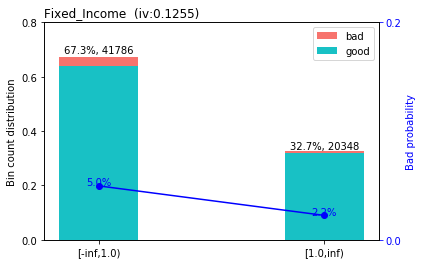

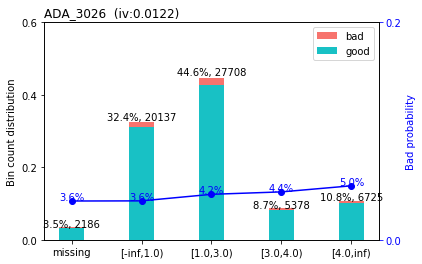

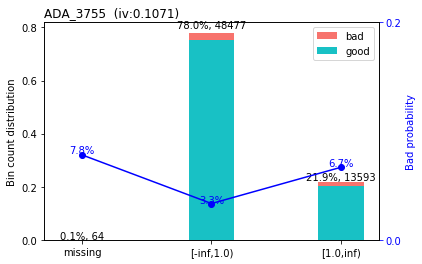

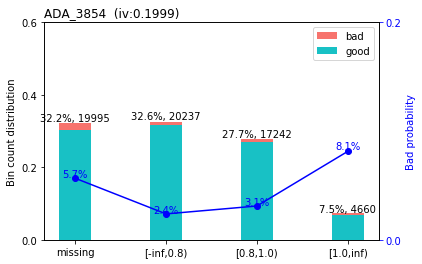

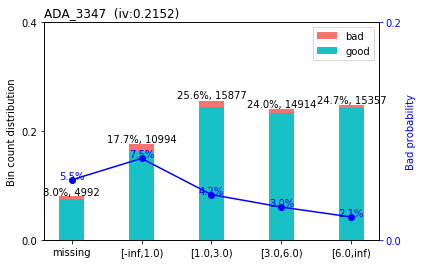

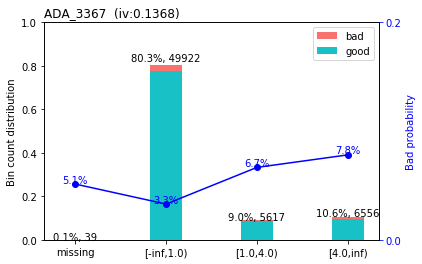

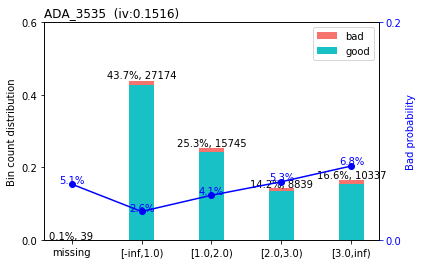

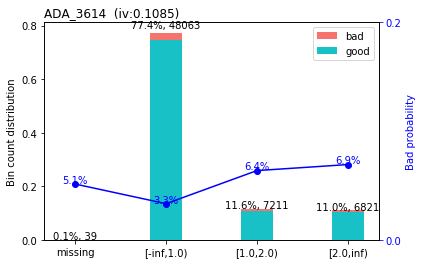

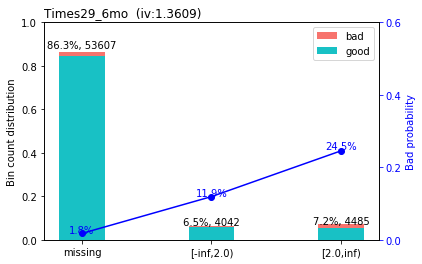

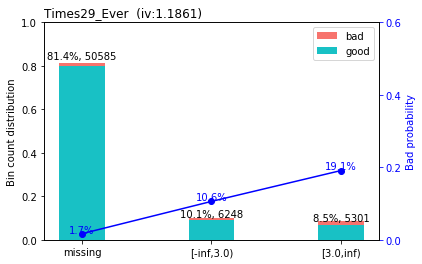

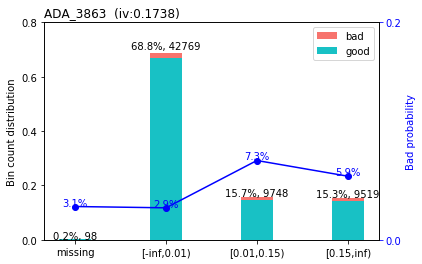

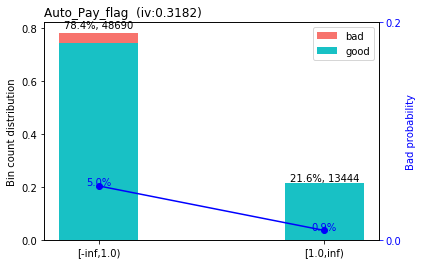

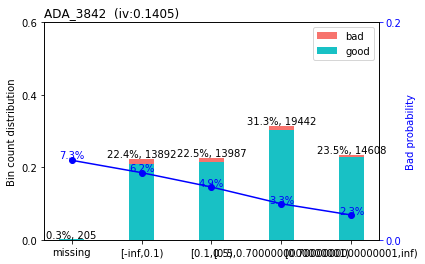

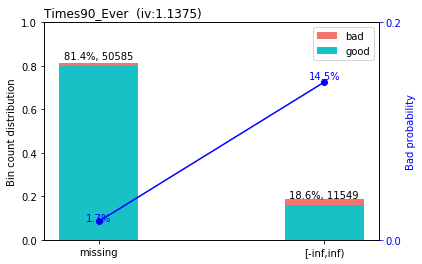

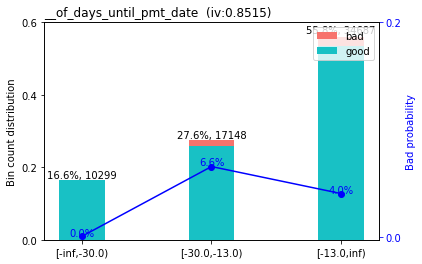

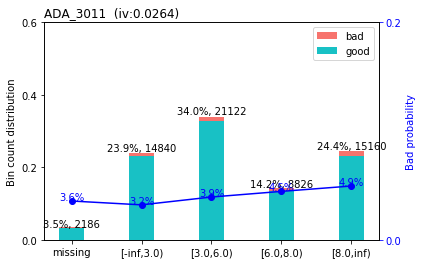

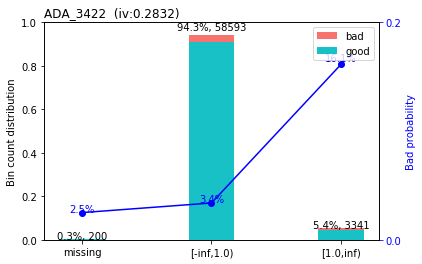

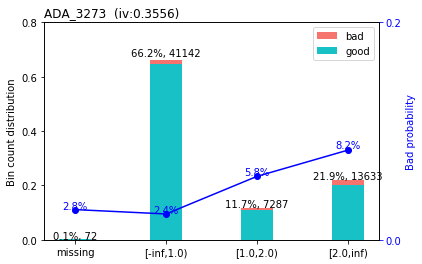

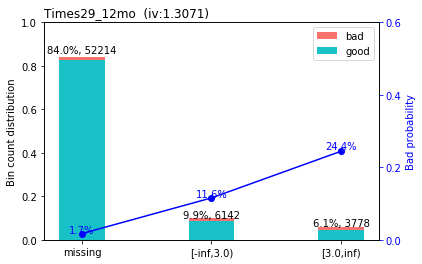

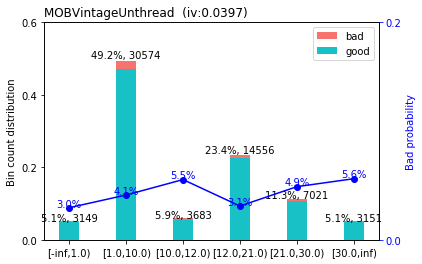

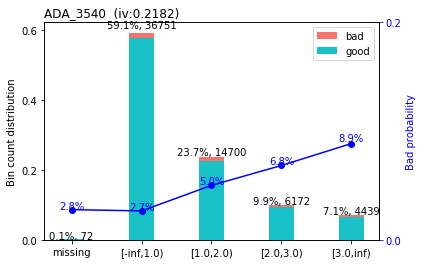

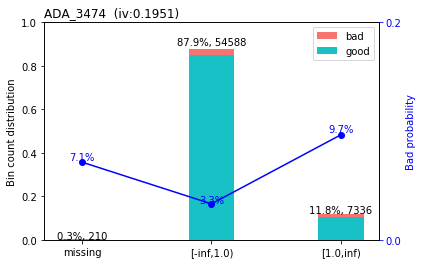

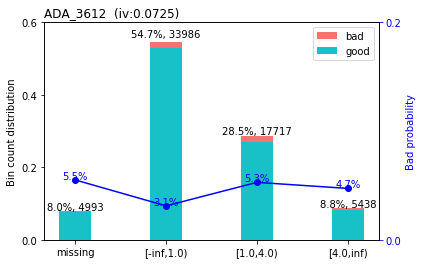

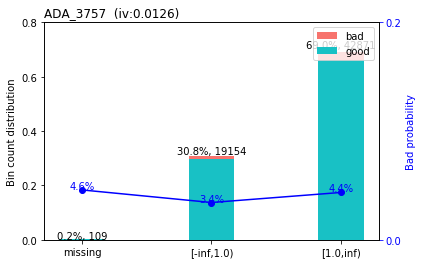

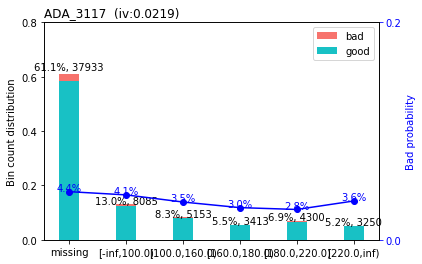

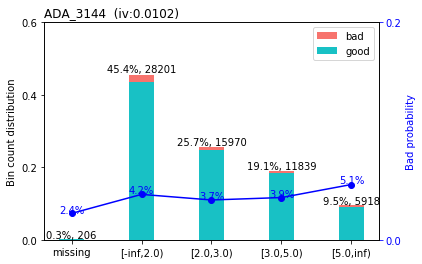

In [22]:
plotlist=sc.woebin_plot(bins_adj)

In [23]:
for key,i in plotlist.items():
#     plt.show(i)
    i.savefig('/home/ec2-user/SageMaker/propensity_to_pay/model_monitor/slowsecure_char/'+str(key)+'.png')

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


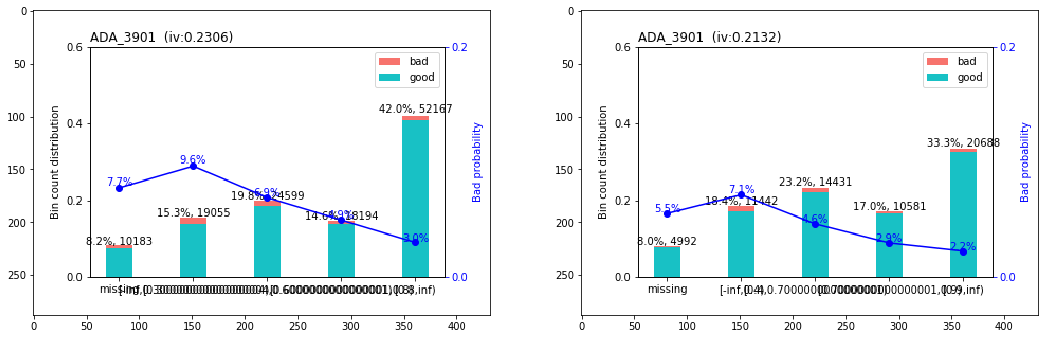

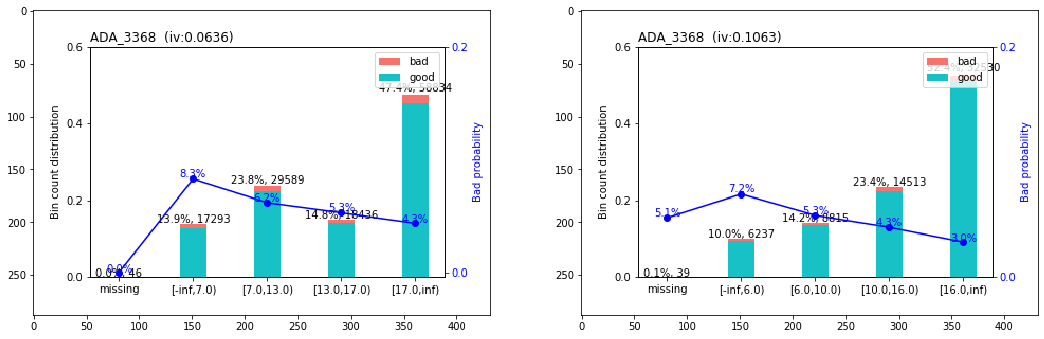

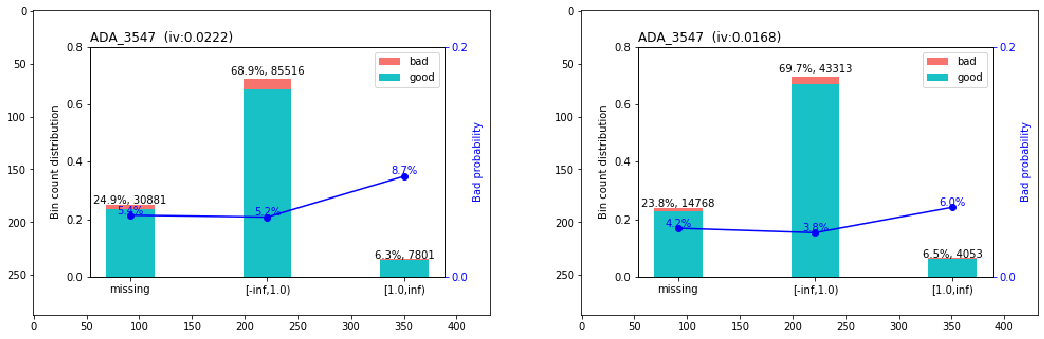

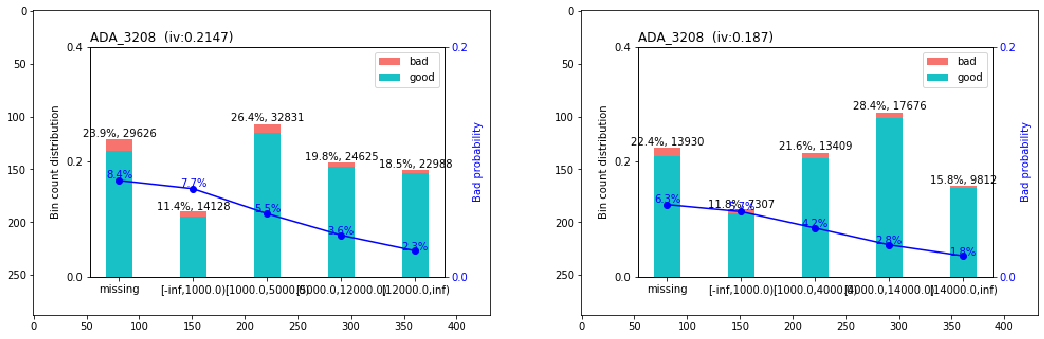

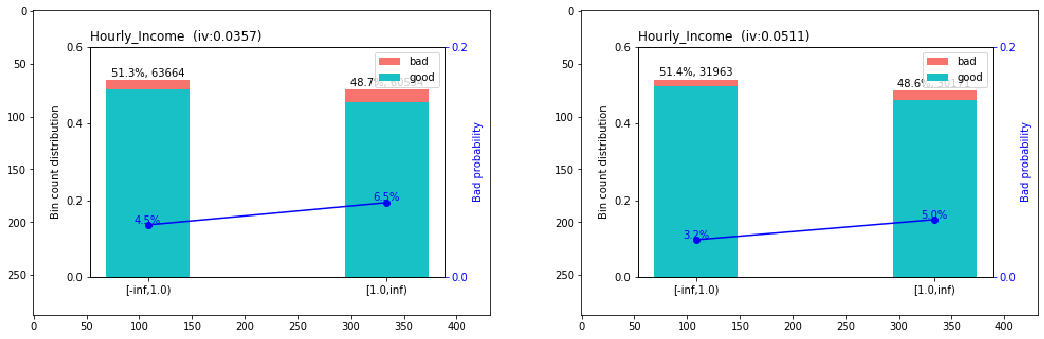

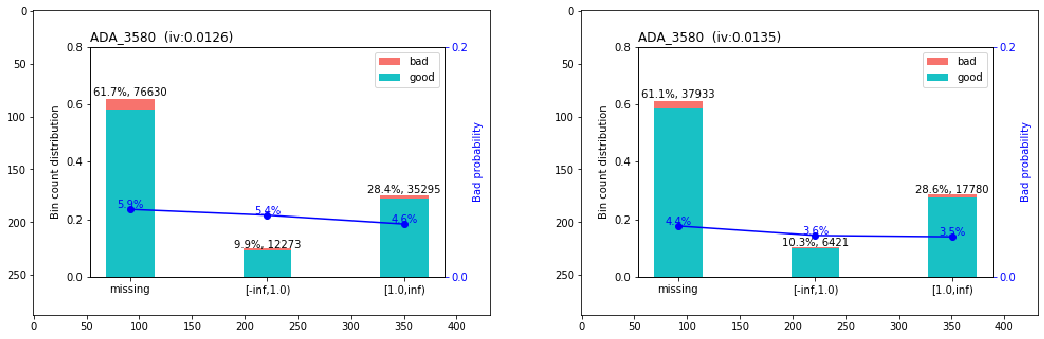

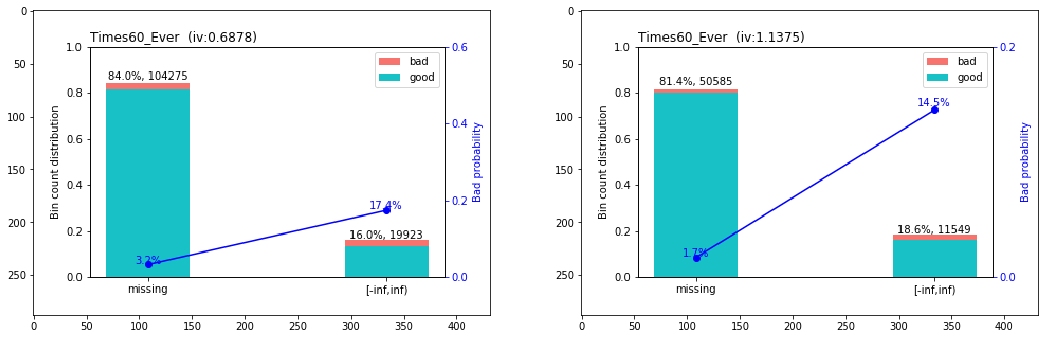

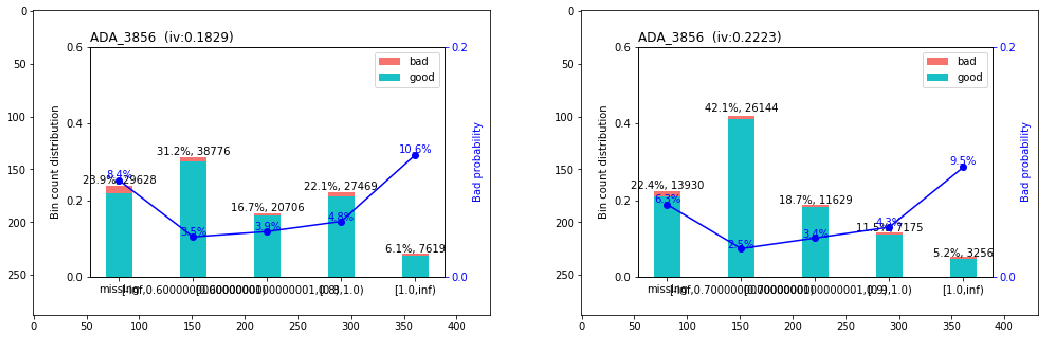

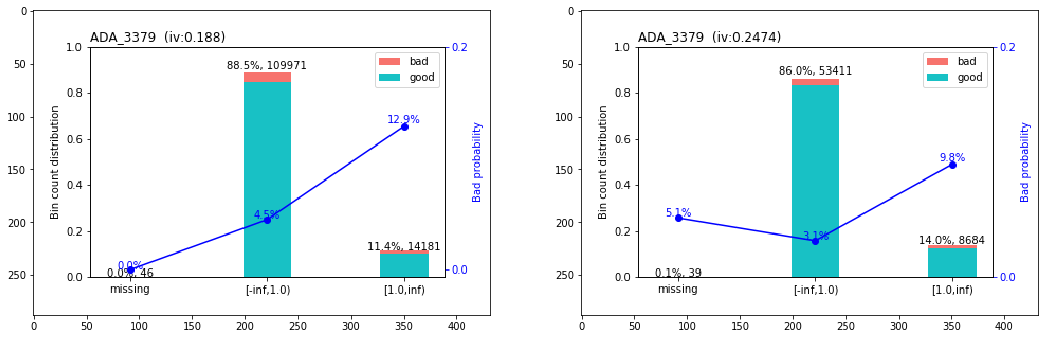

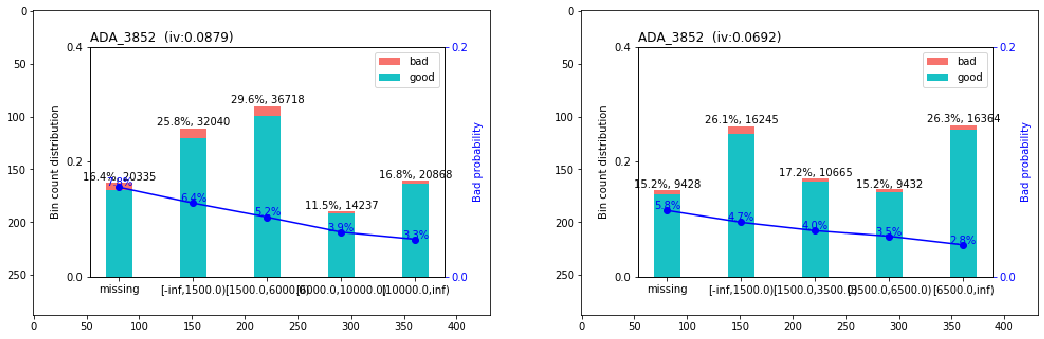

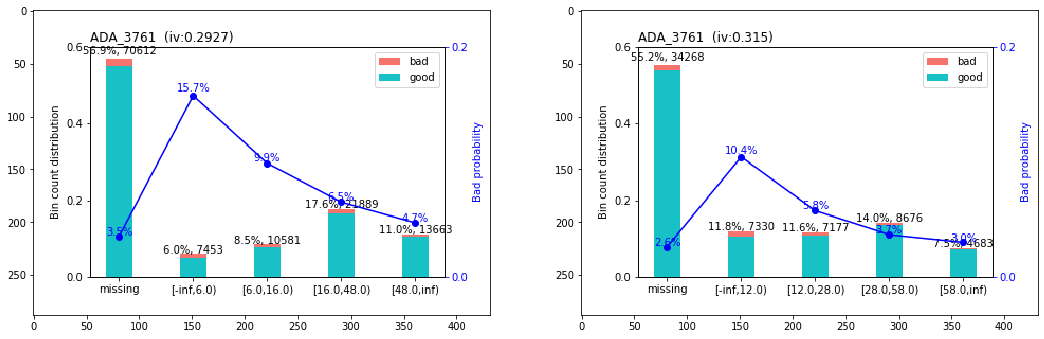

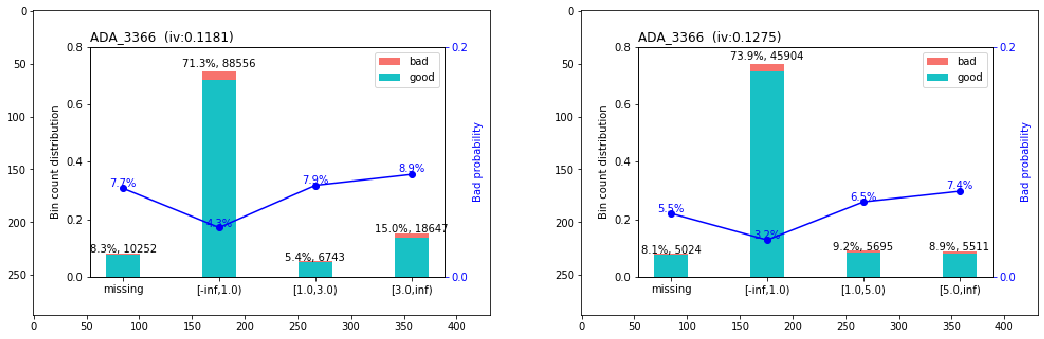

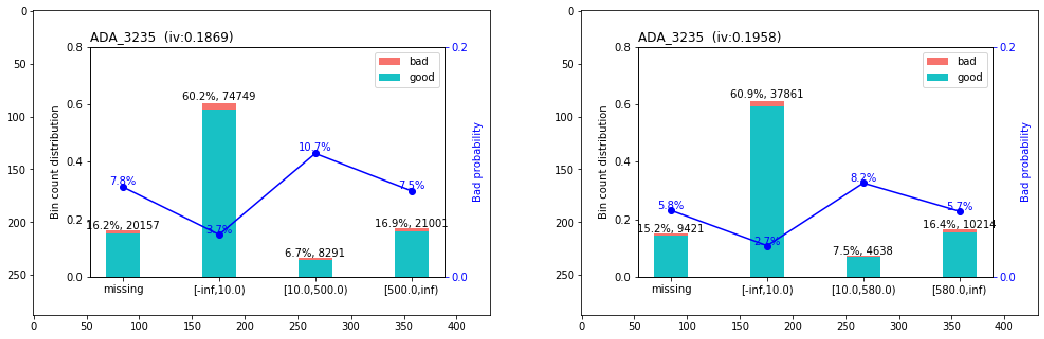

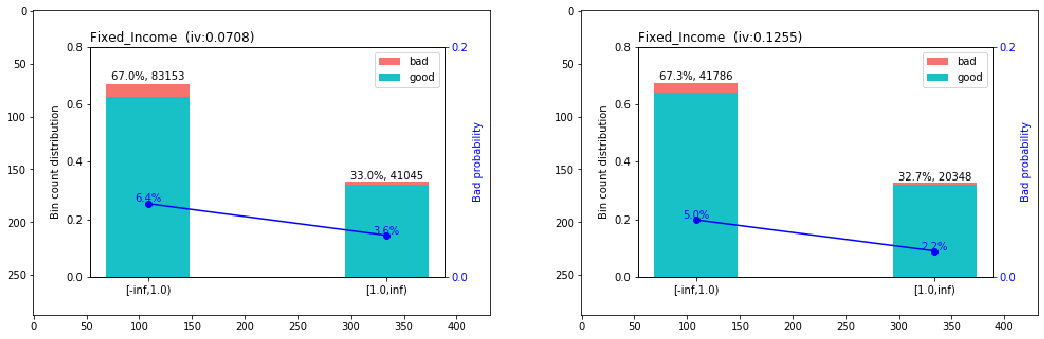

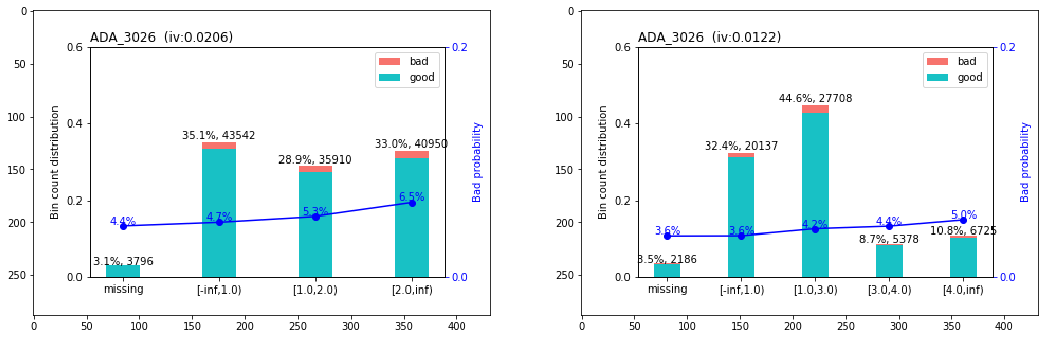

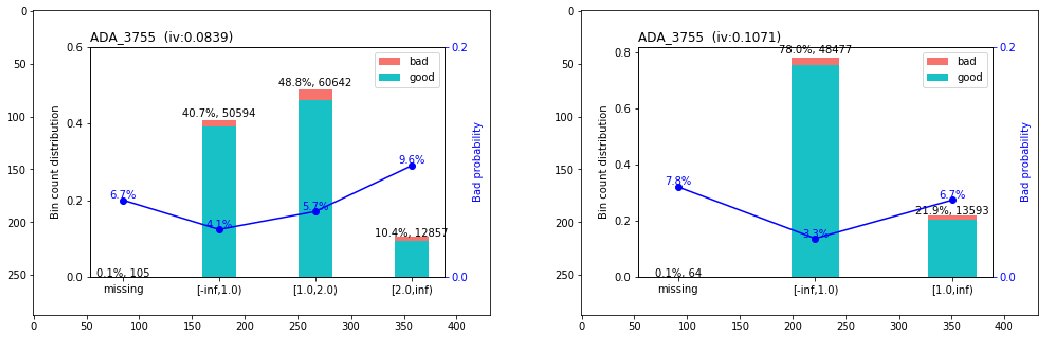

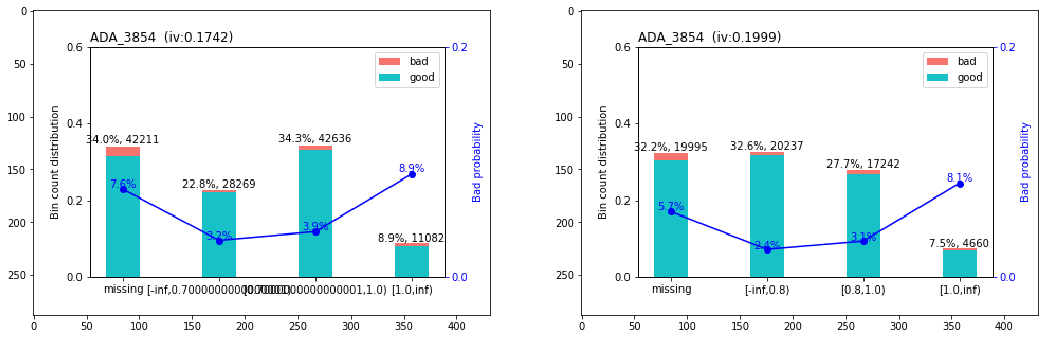

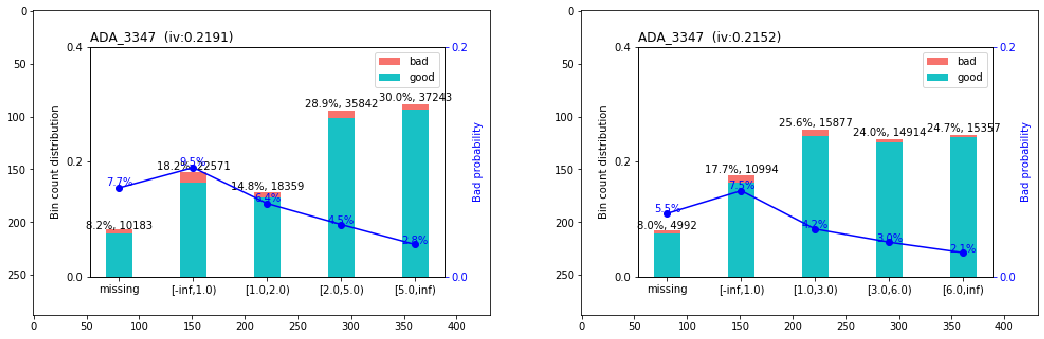

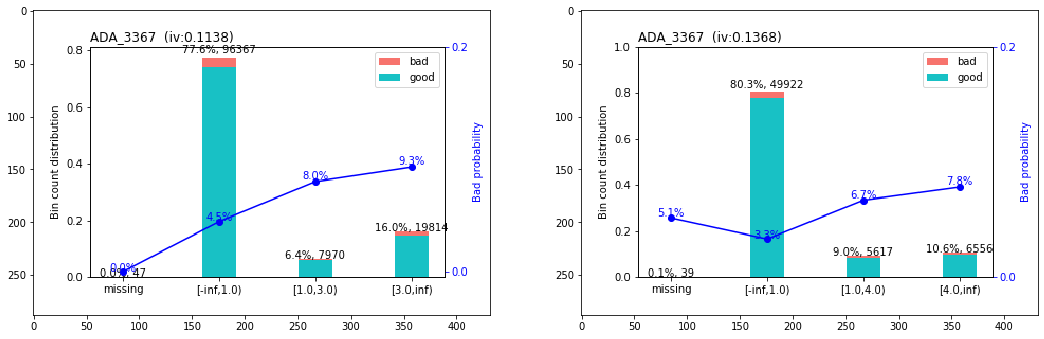

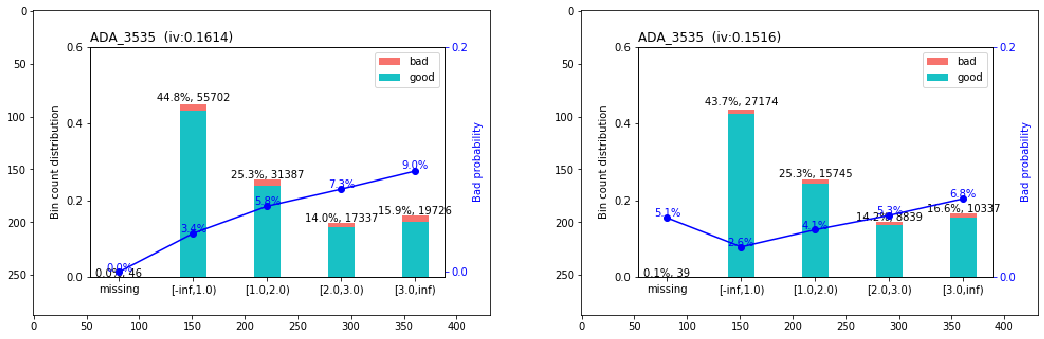

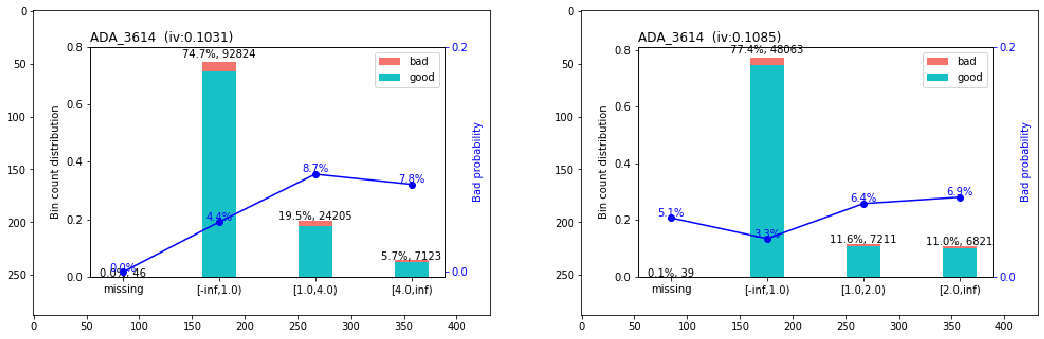

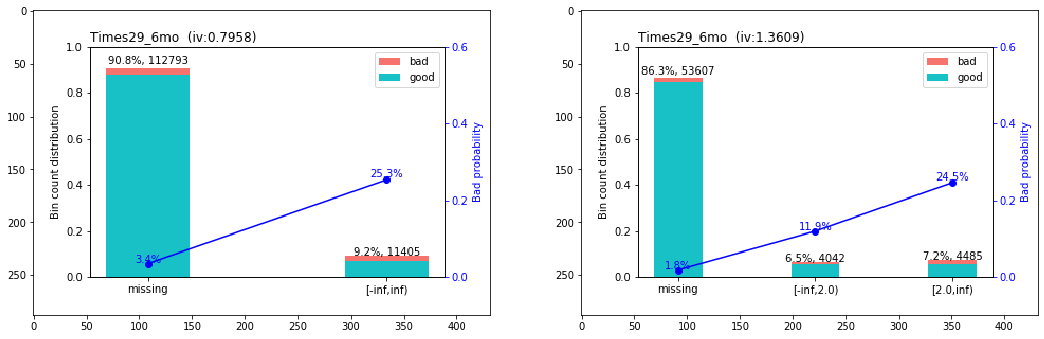

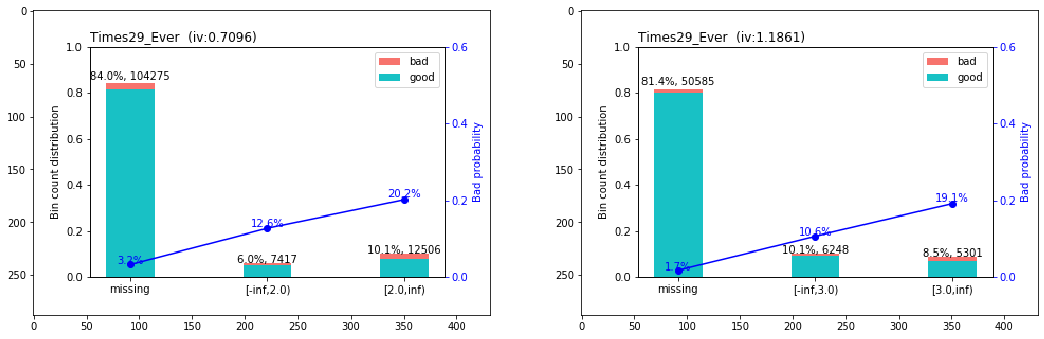

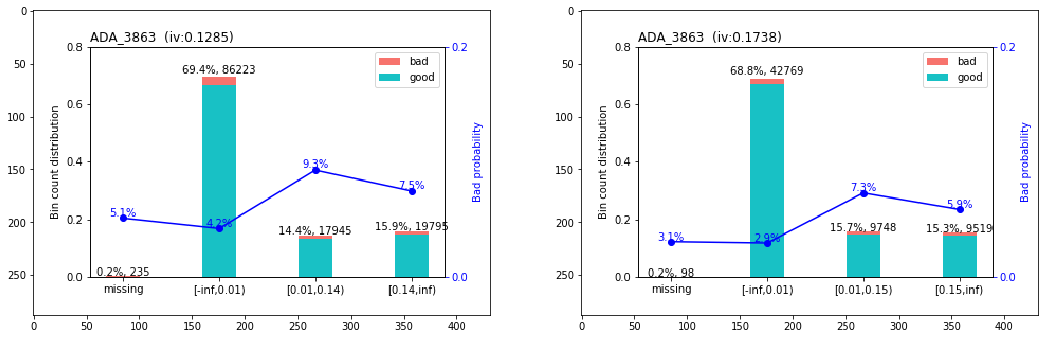

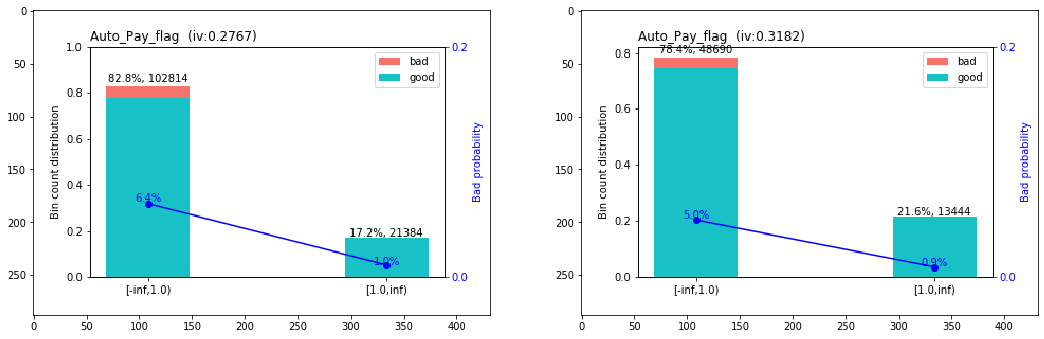

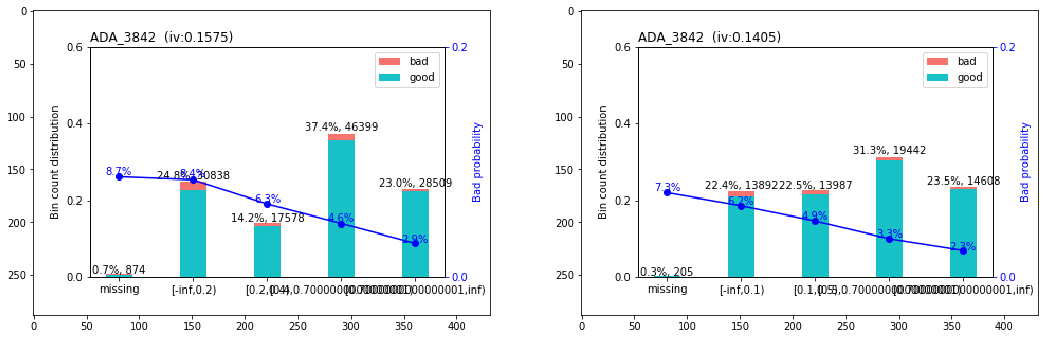

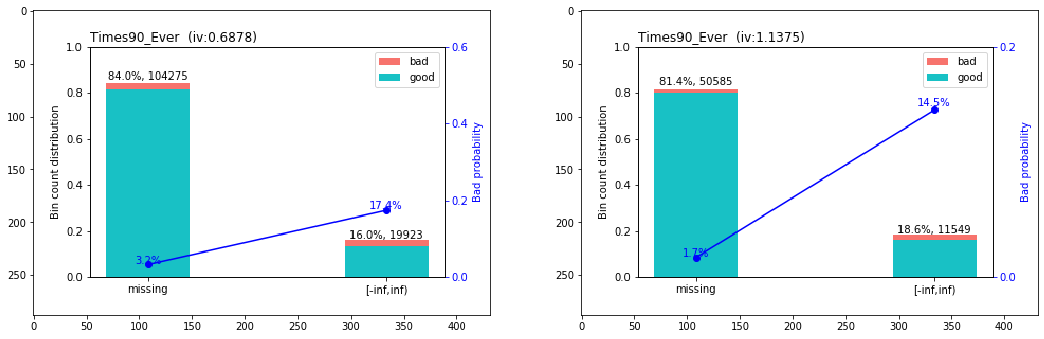

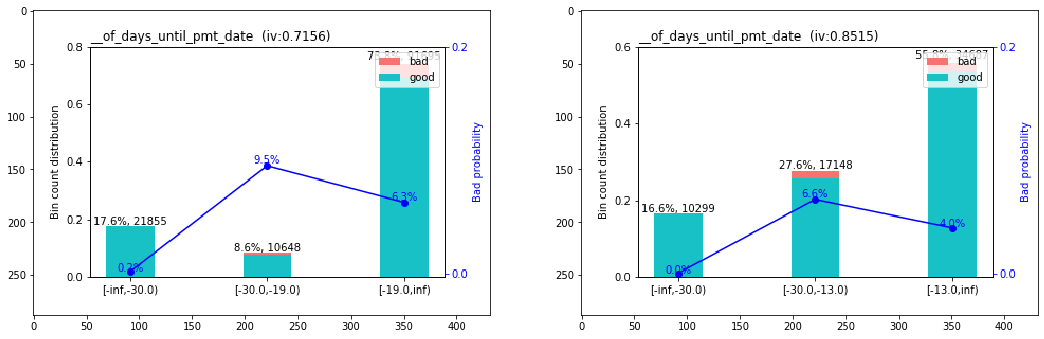

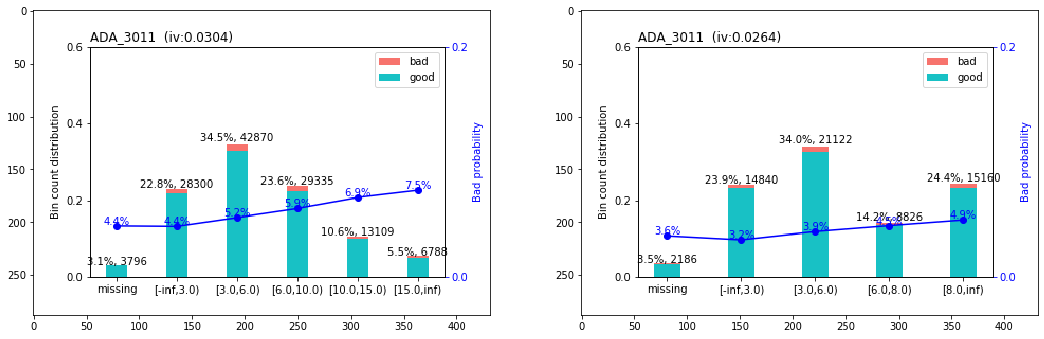

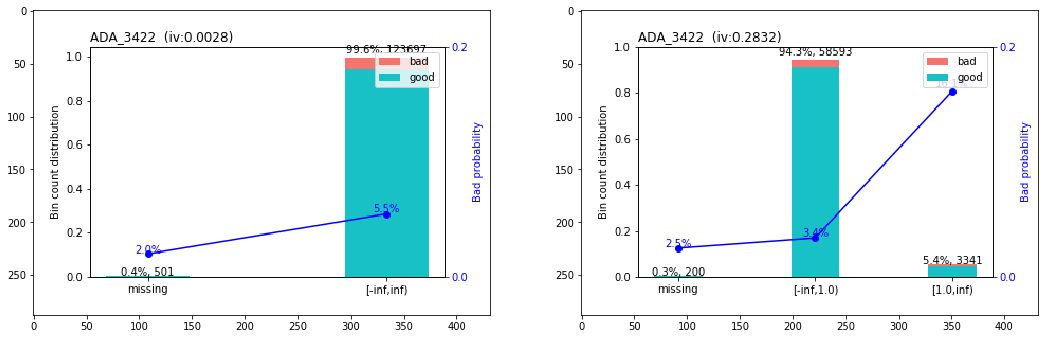

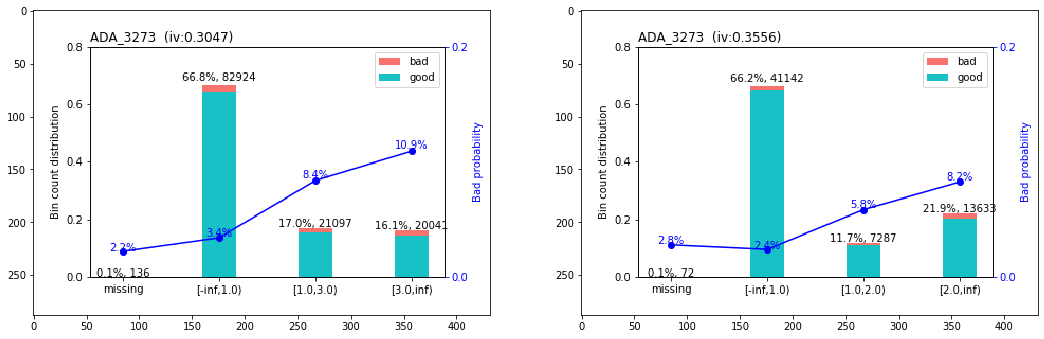

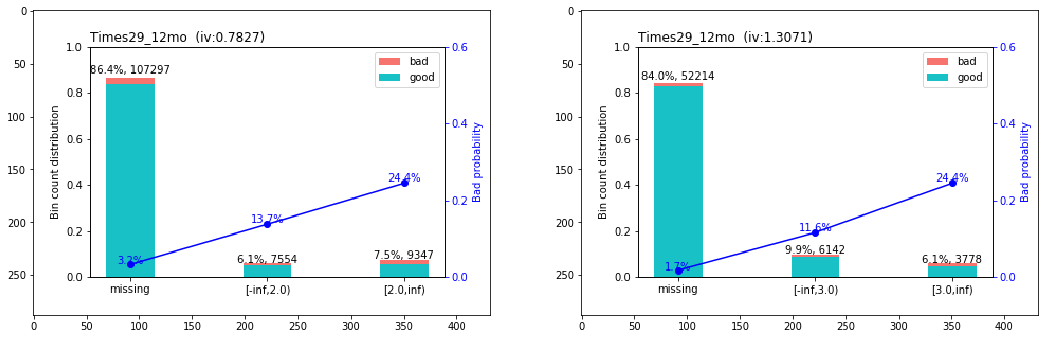

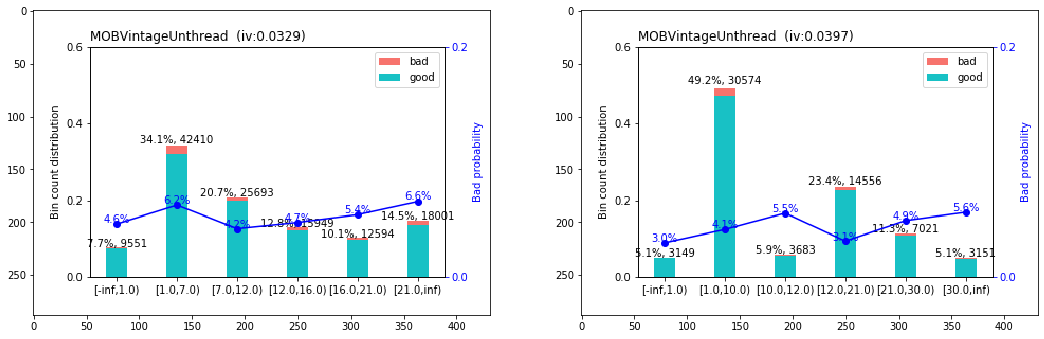

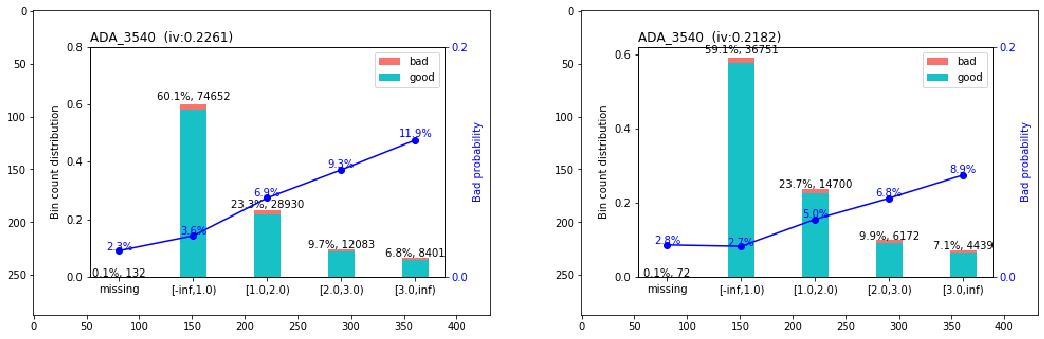

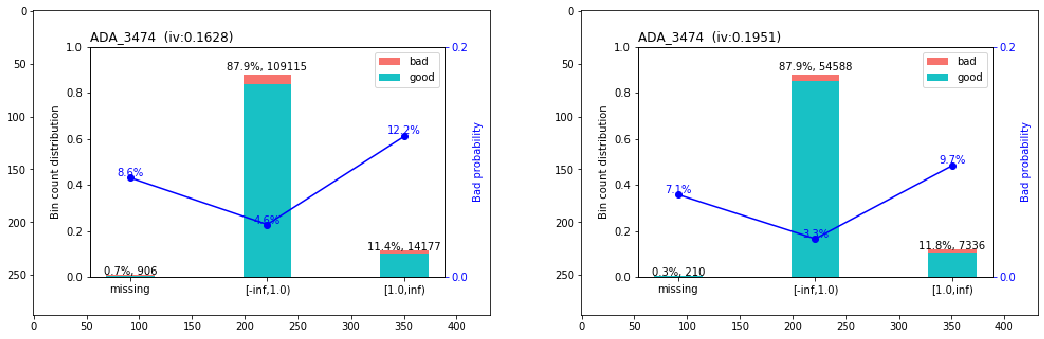

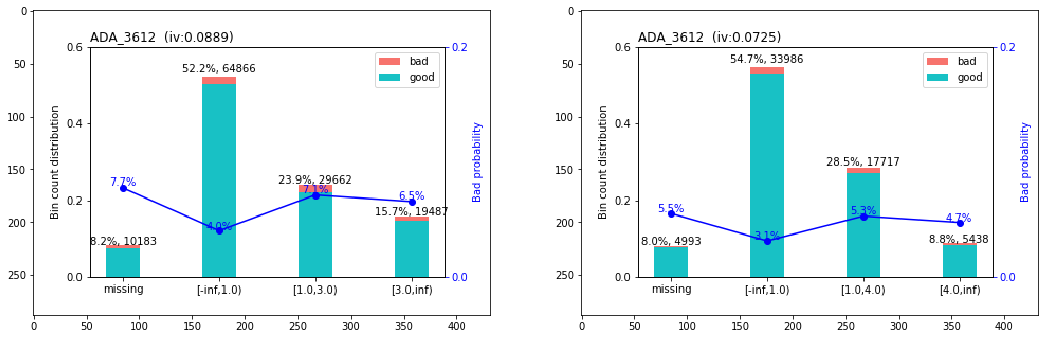

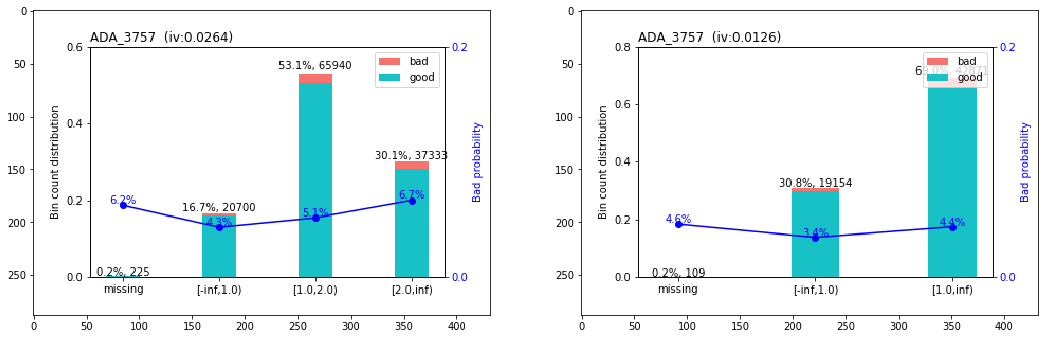

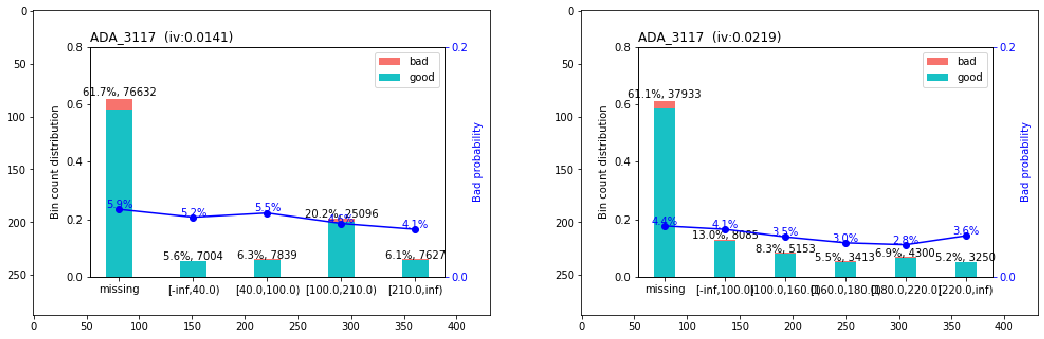

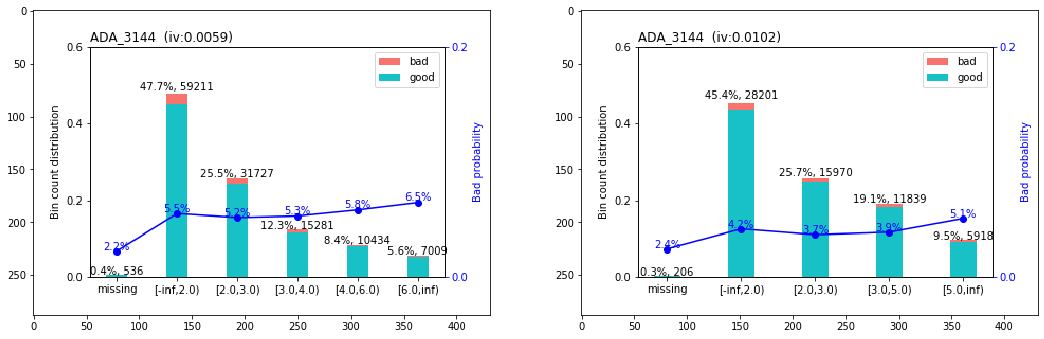

In [24]:
from IPython.display import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams

%matplotlib inline

# figure size in inches optional
rcParams['figure.figsize'] = 18 ,15

for key,i in plotlist.items():
    # read images
    img_A = mpimg.imread('/home/ec2-user/SageMaker/propensity_to_pay/slowsecure/char/' + str(key)+ '.png')
    img_B = mpimg.imread('/home/ec2-user/SageMaker/propensity_to_pay/model_monitor/slowsecure_char/'+ str(key)+ '.png')

    # display images
    fig, ax = plt.subplots(1,2)
    ax[0].imshow(img_A)
    ax[1].imshow(img_B)


# plot slowunsecure chars and compare with development sample

In [25]:

rcParams['figure.figsize'] = 6.0 ,4.0
bins_adj = sc.woebin(df2, y="badflag")


[INFO] creating woe binning ...
Binning on 335349 rows and 39 columns in 00:00:46


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/scorecardpy/woebin.py:1203: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax1 = plt.subplots()
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/scorecardpy/woebin.py:1203: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax1 = plt.subplots()
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/scorecardpy/woebin.py:1203: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figu

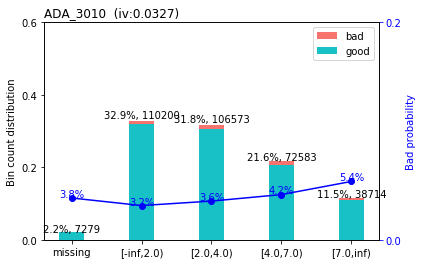

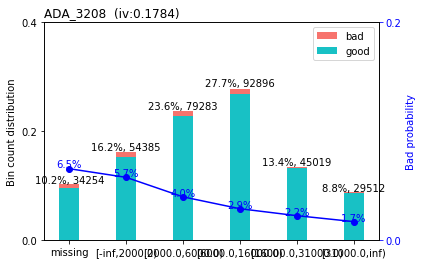

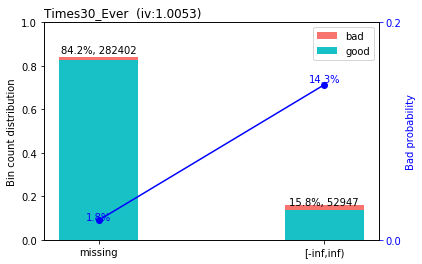

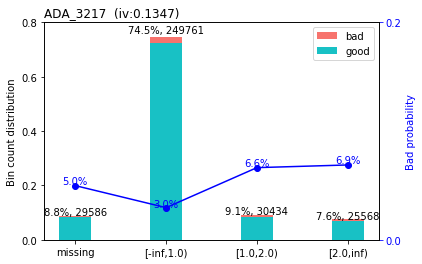

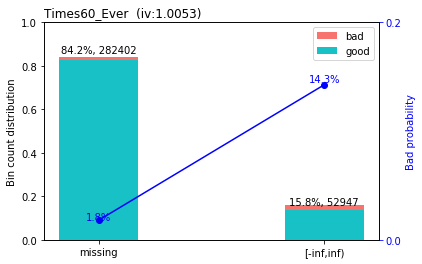

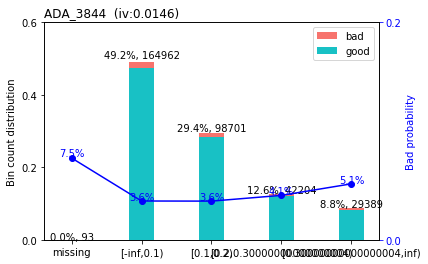

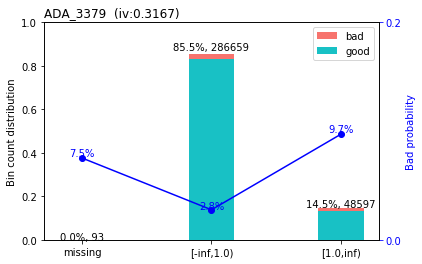

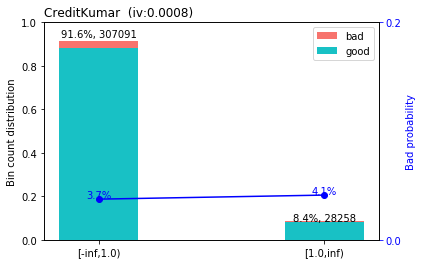

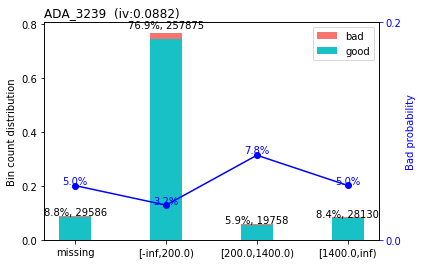

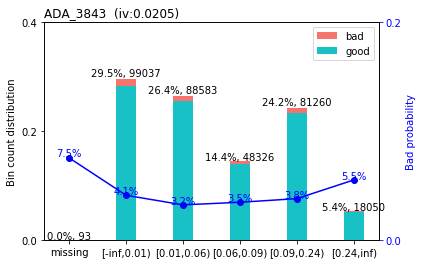

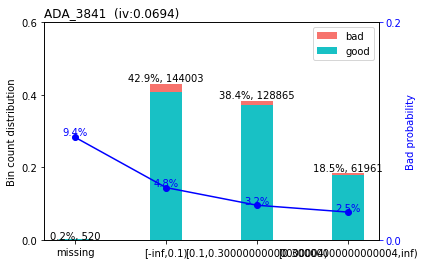

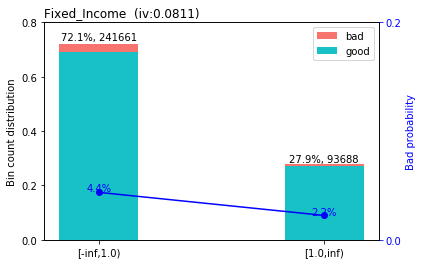

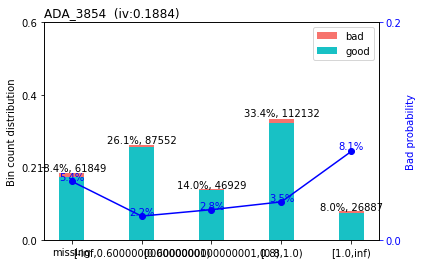

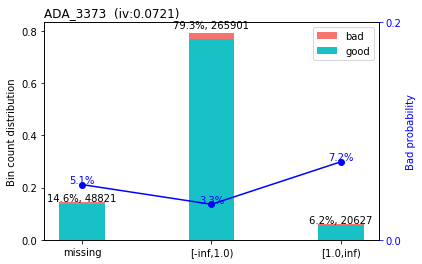

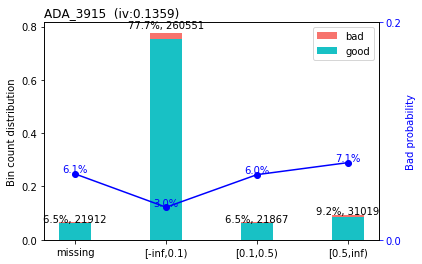

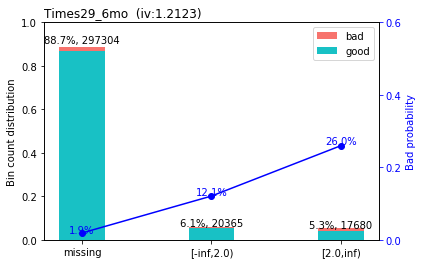

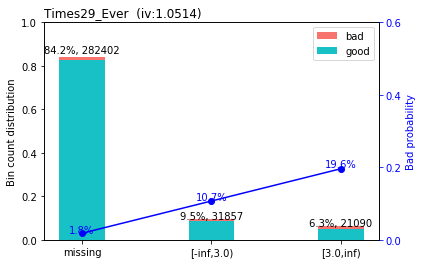

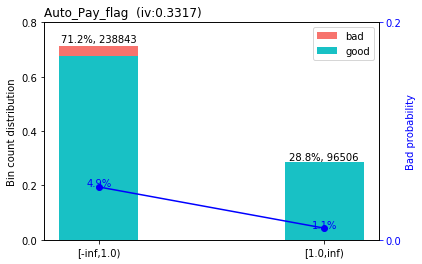

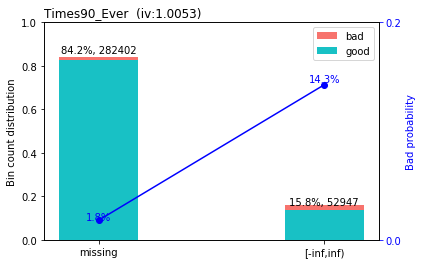

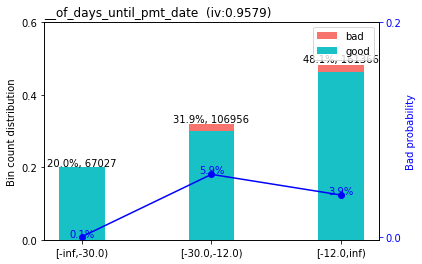

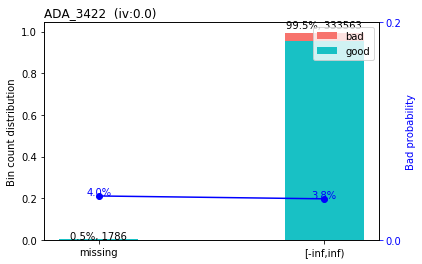

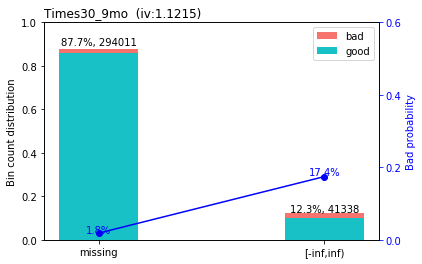

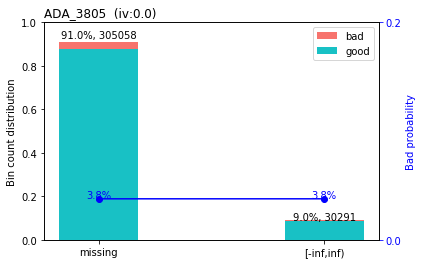

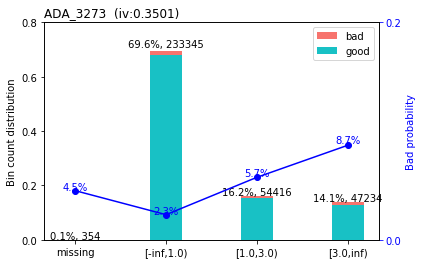

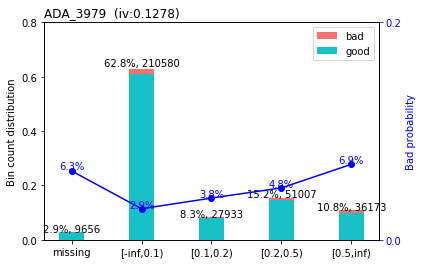

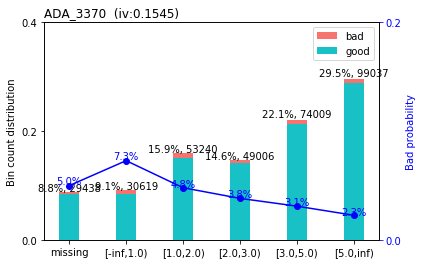

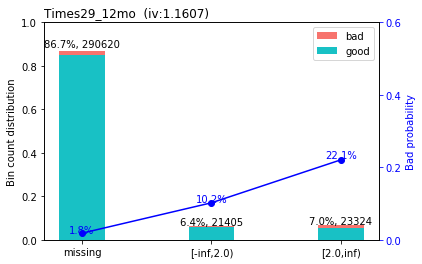

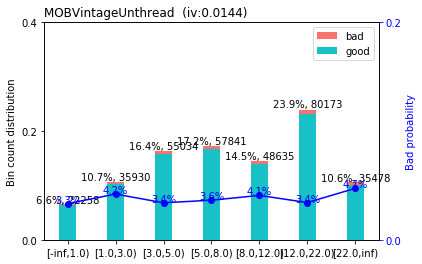

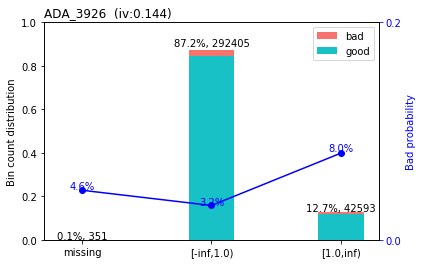

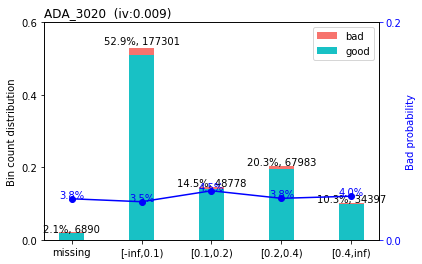

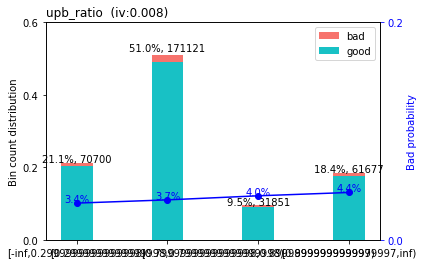

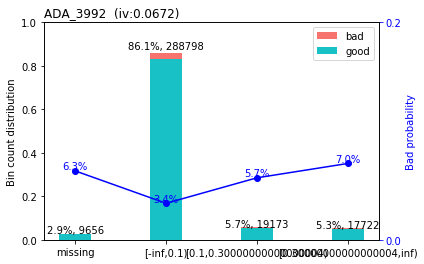

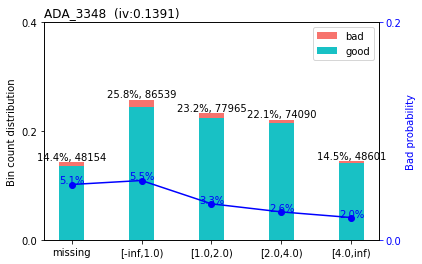

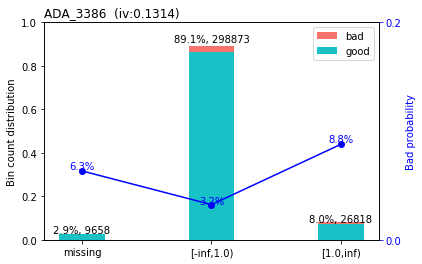

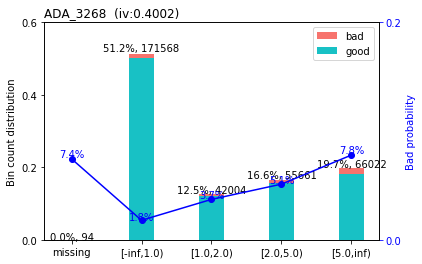

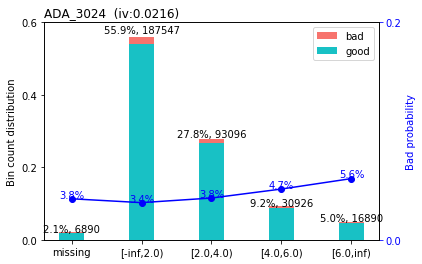

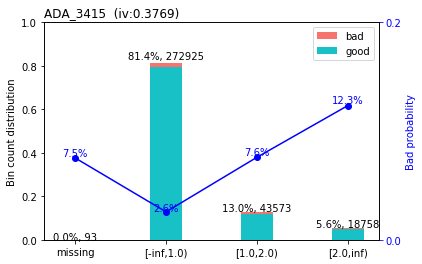

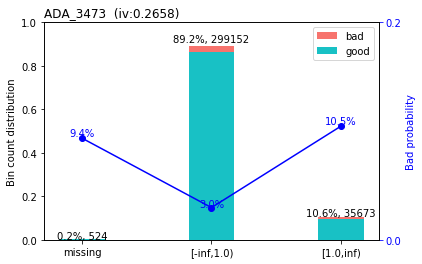

In [26]:
plotlist=sc.woebin_plot(bins_adj)
for key,i in plotlist.items():
#     plt.show(i)
    i.savefig('/home/ec2-user/SageMaker/propensity_to_pay/model_monitor/slowunsecure_char/'+str(key)+'.png')

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


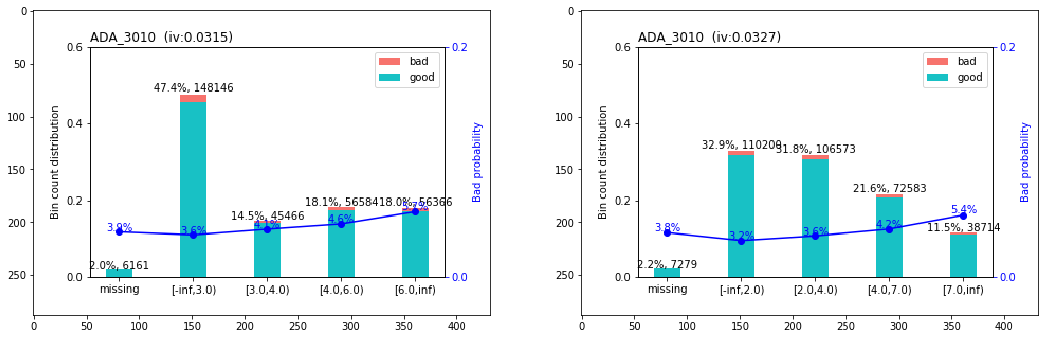

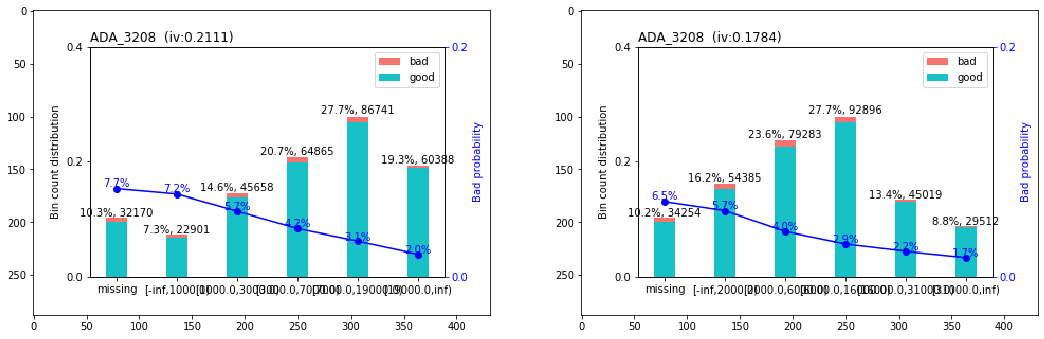

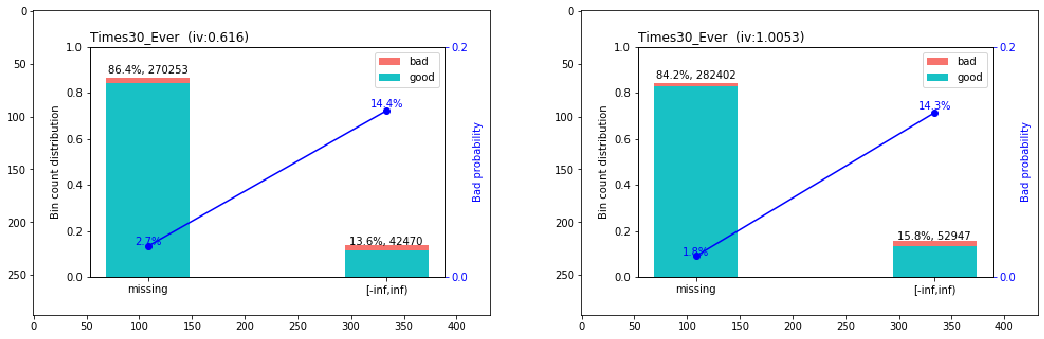

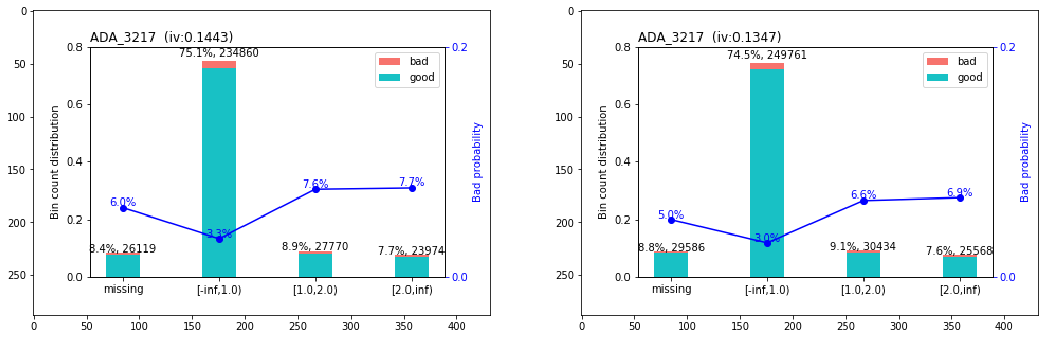

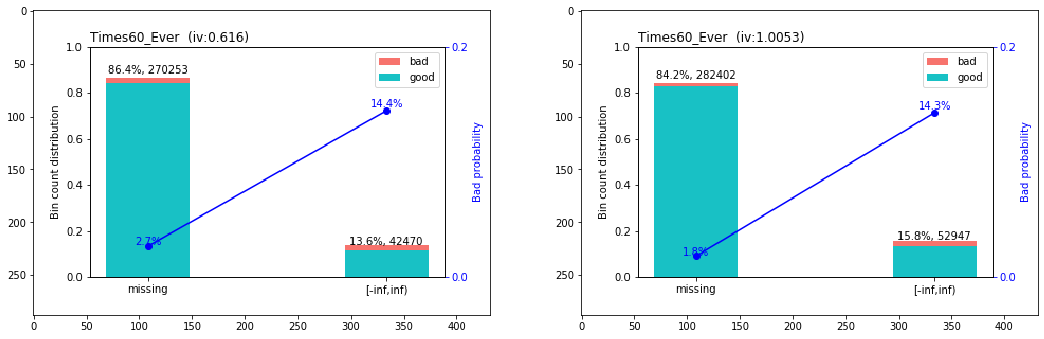

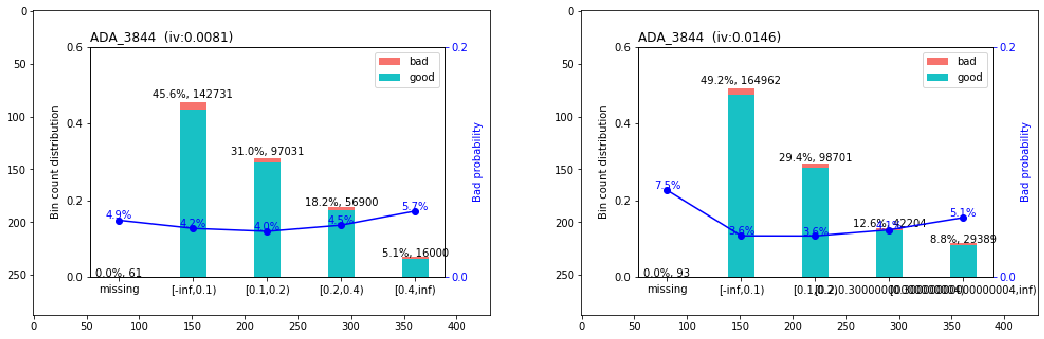

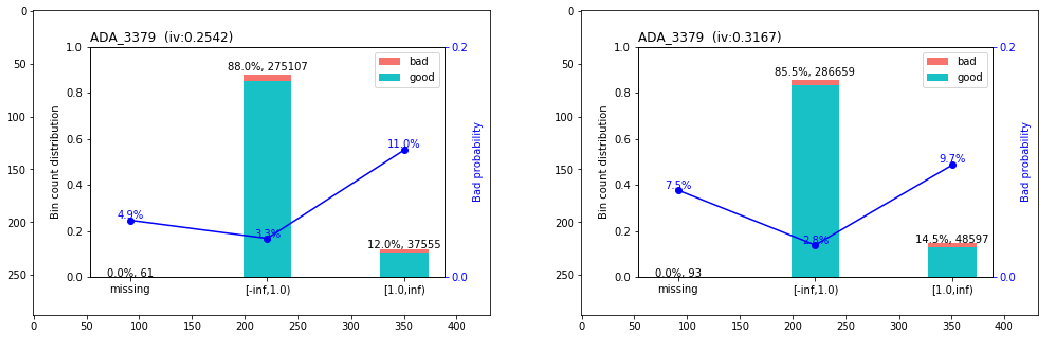

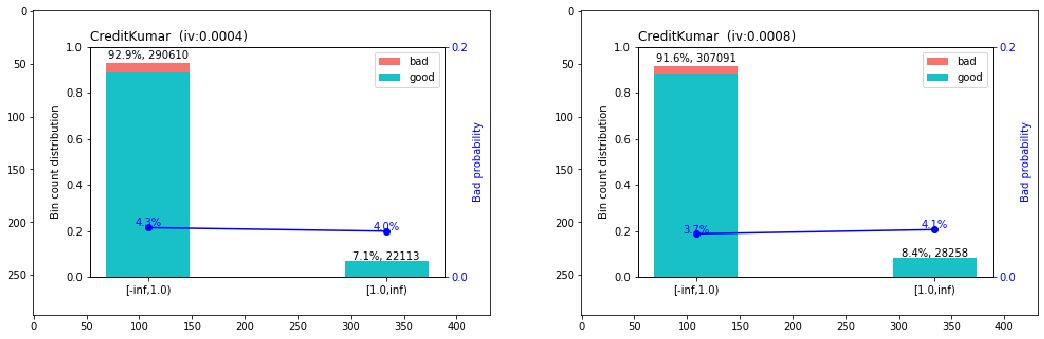

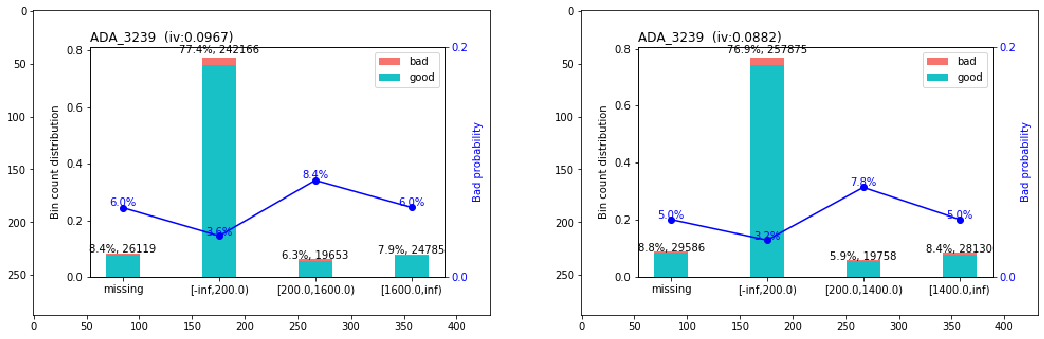

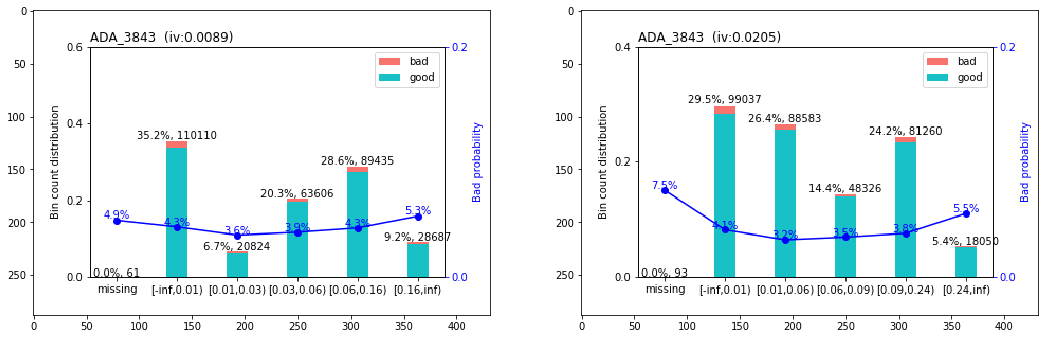

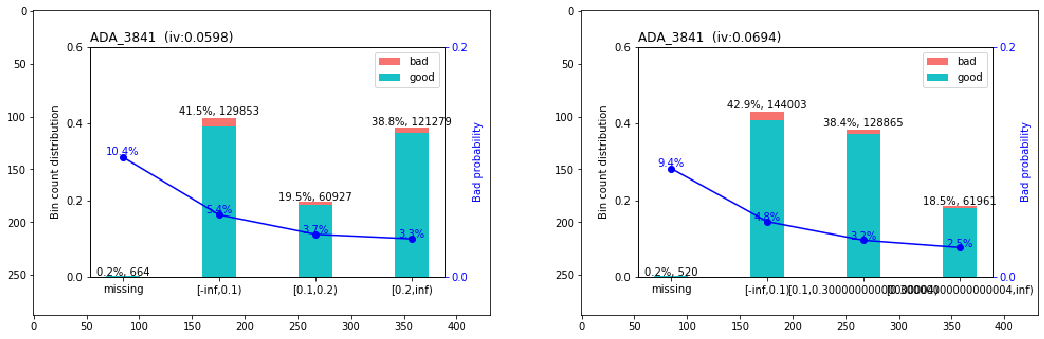

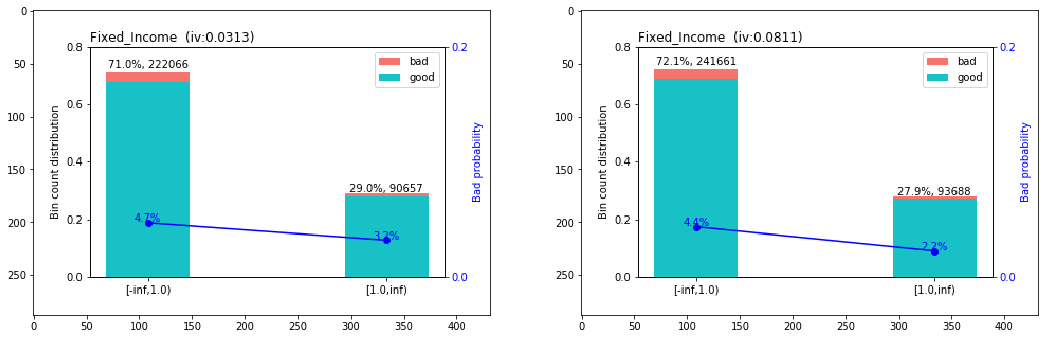

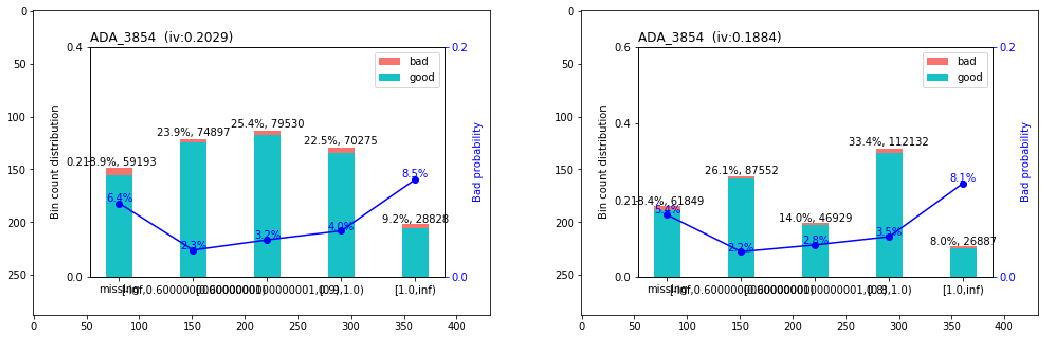

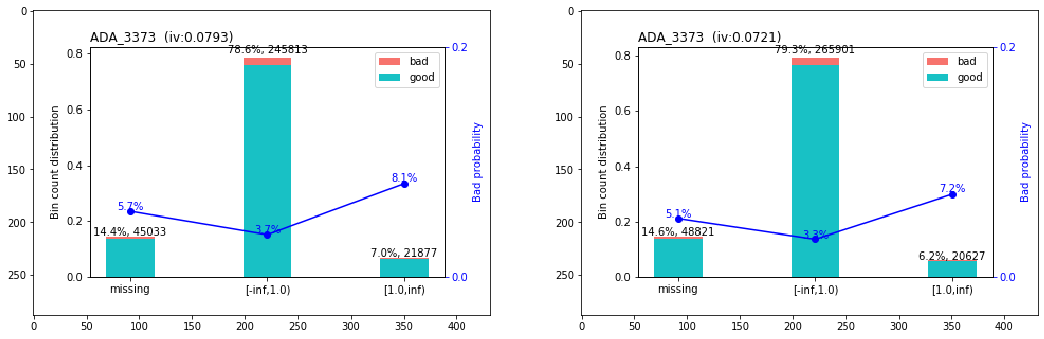

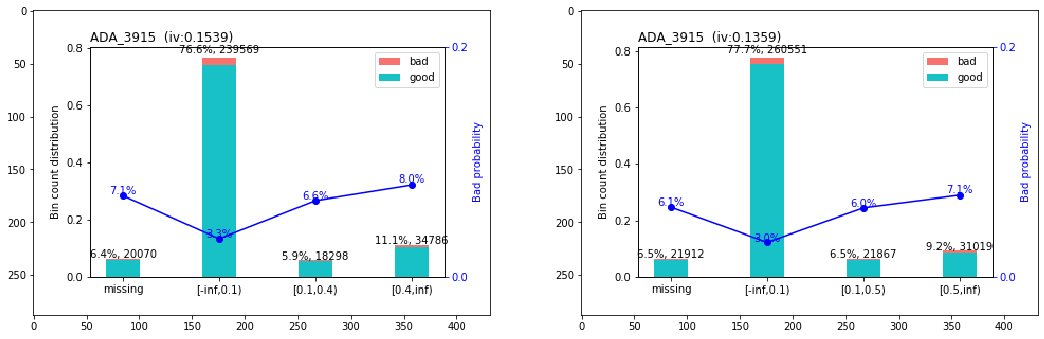

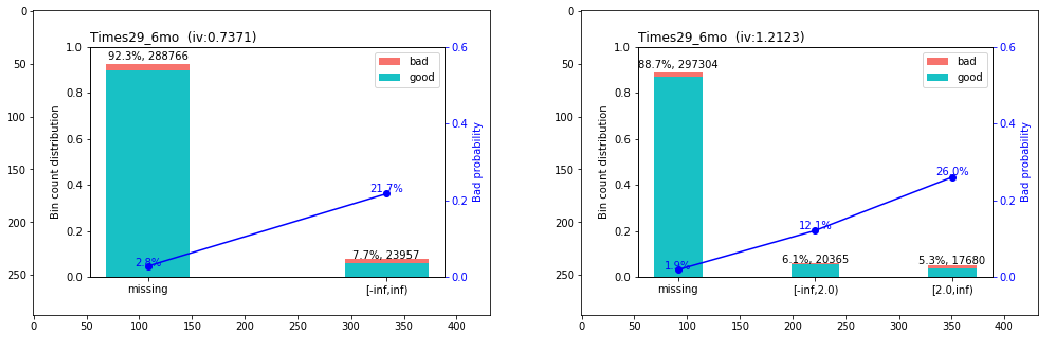

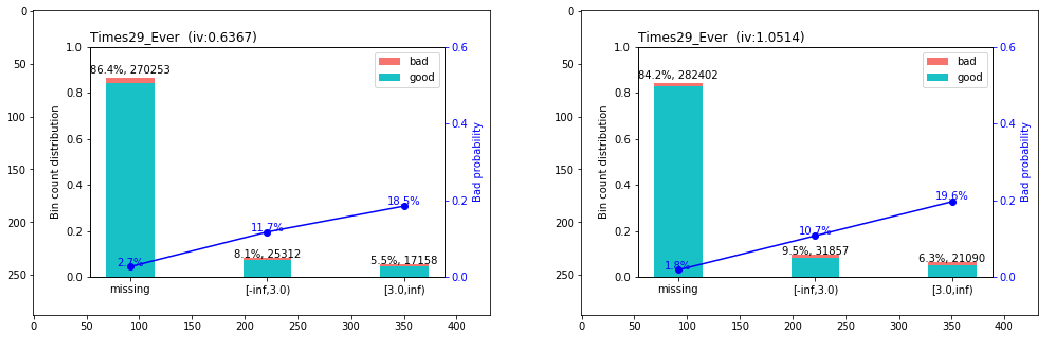

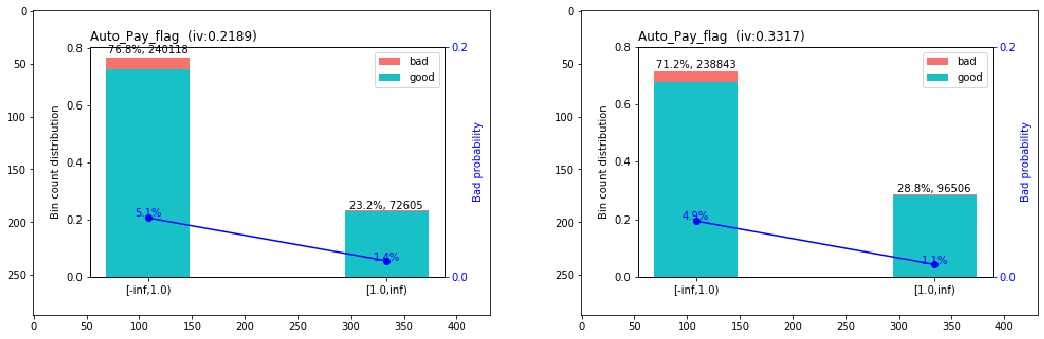

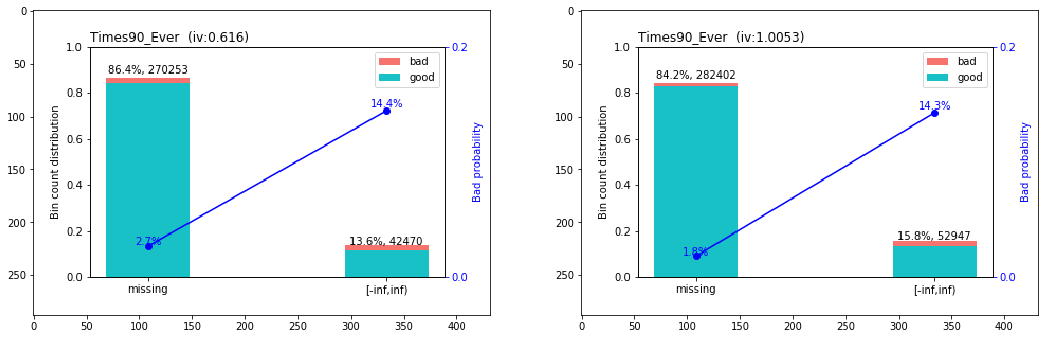

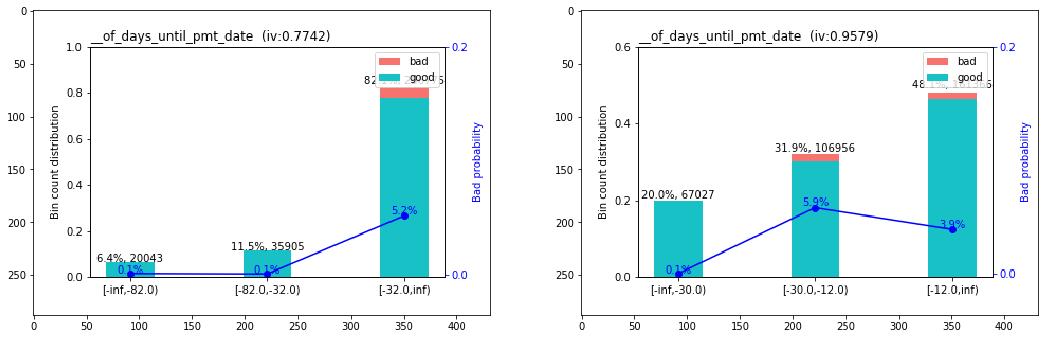

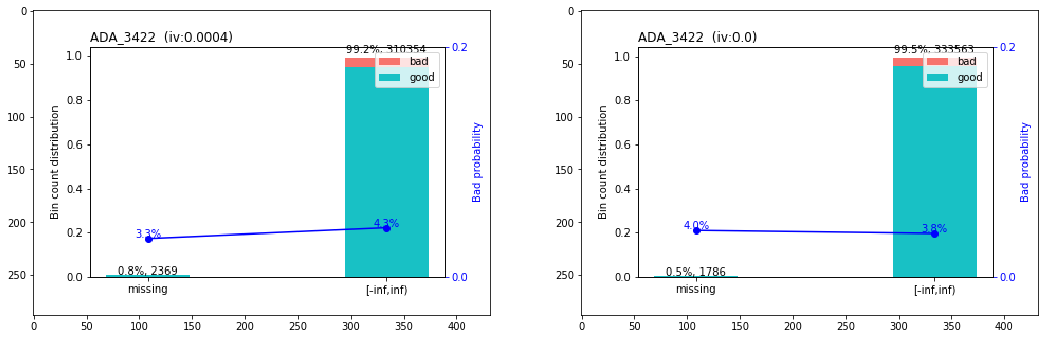

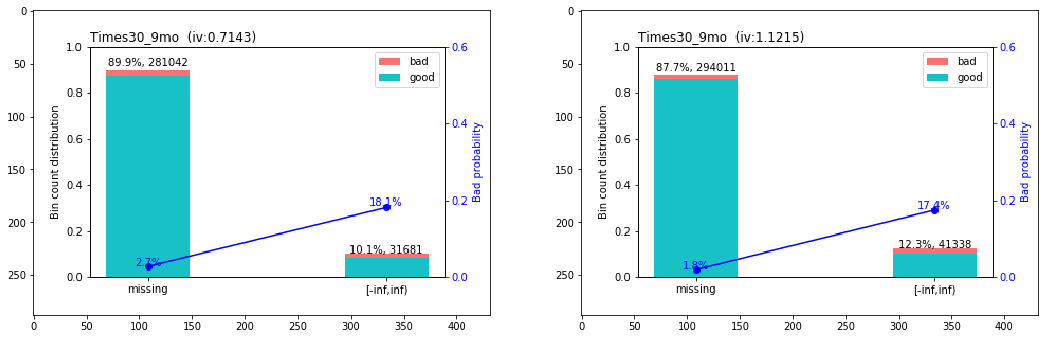

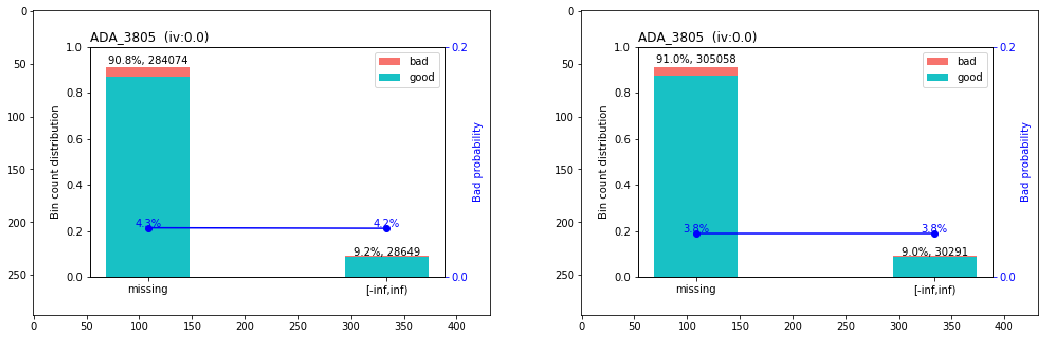

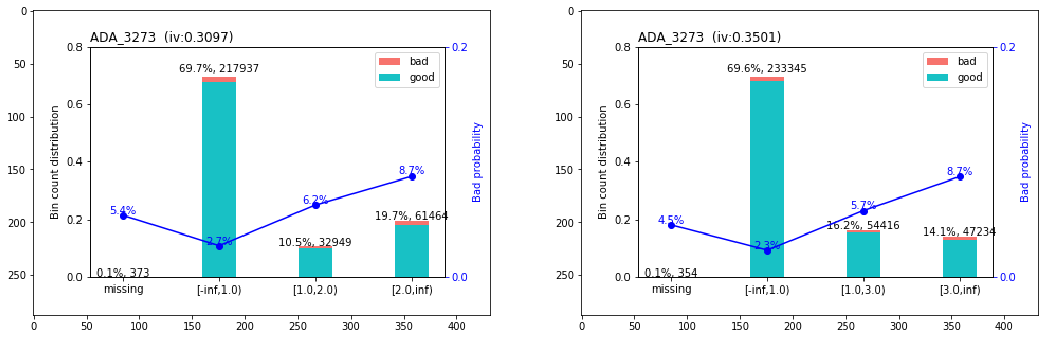

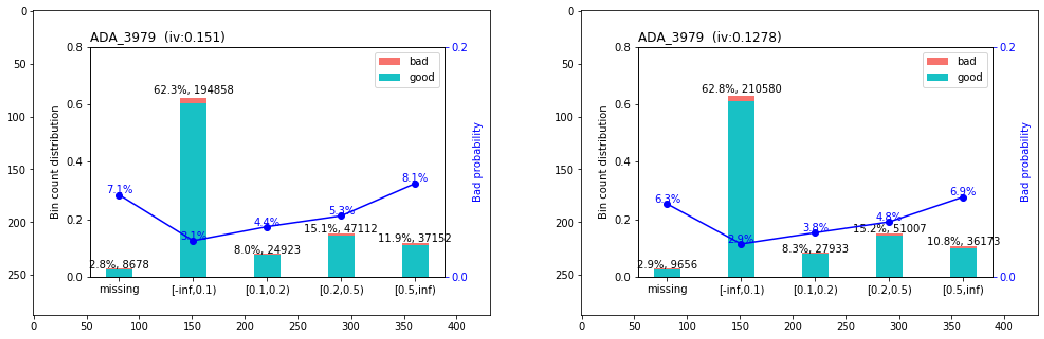

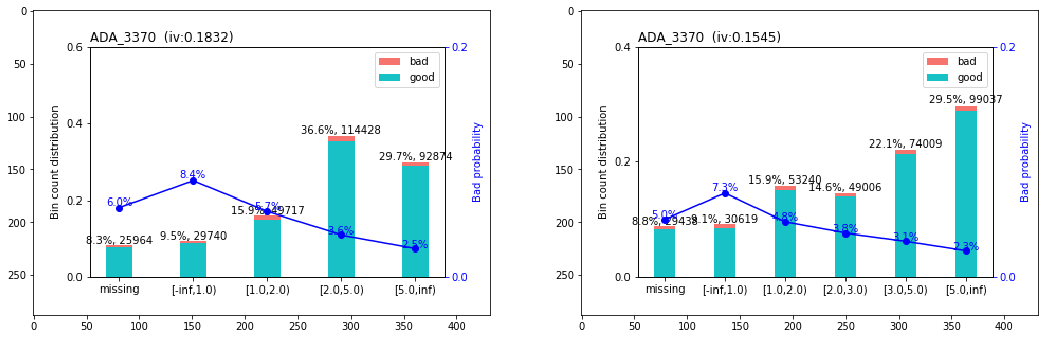

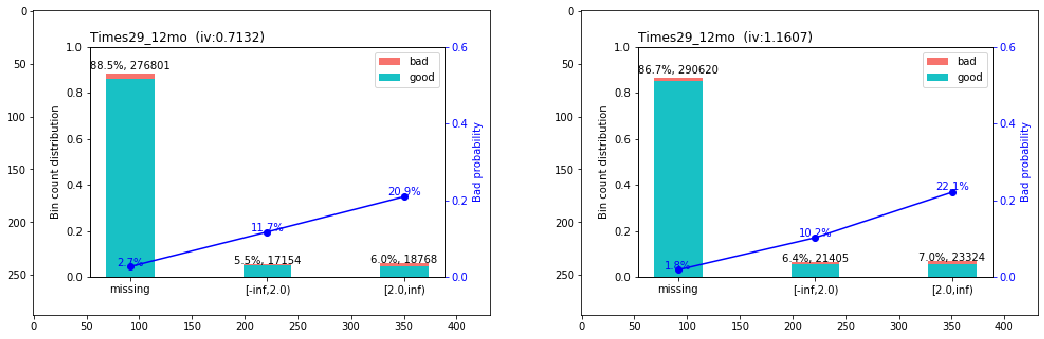

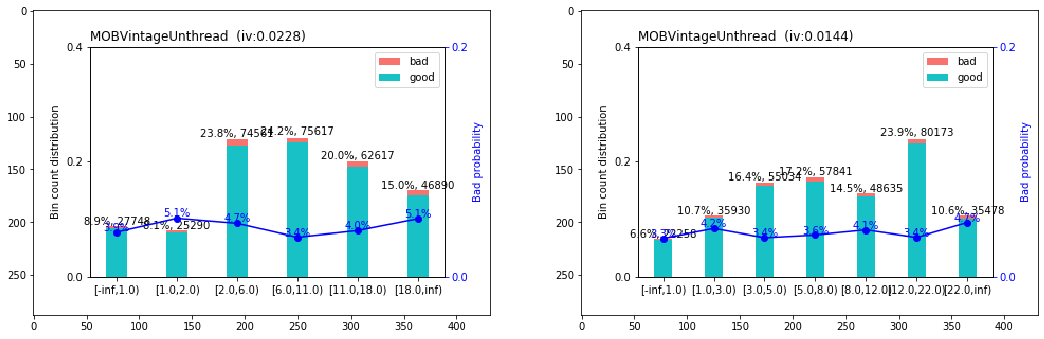

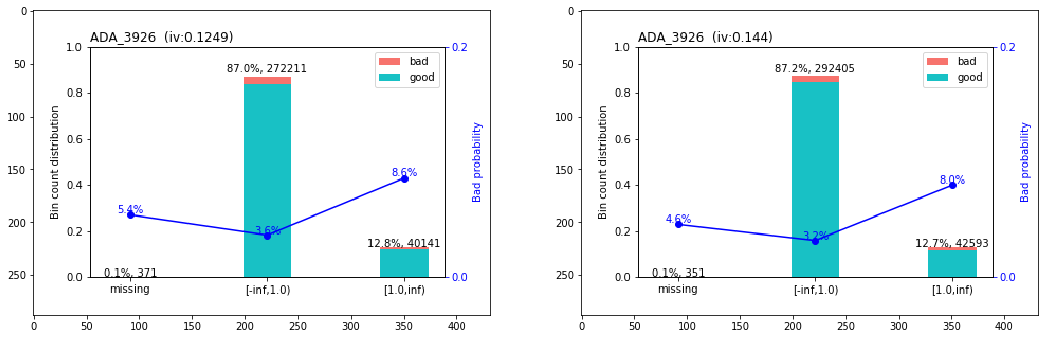

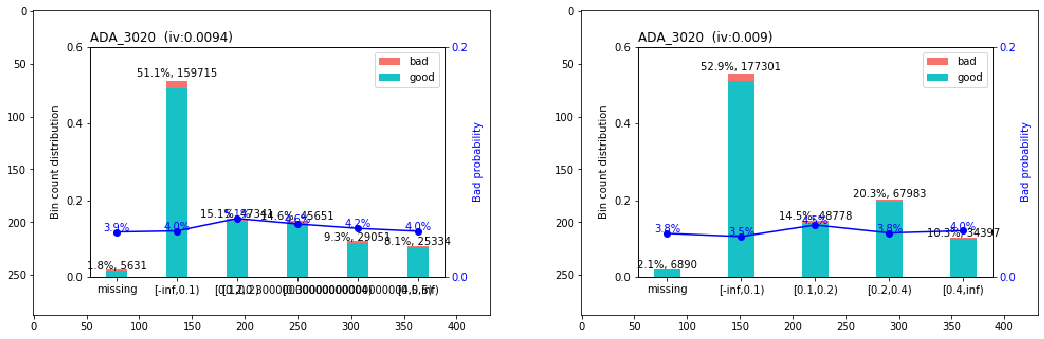

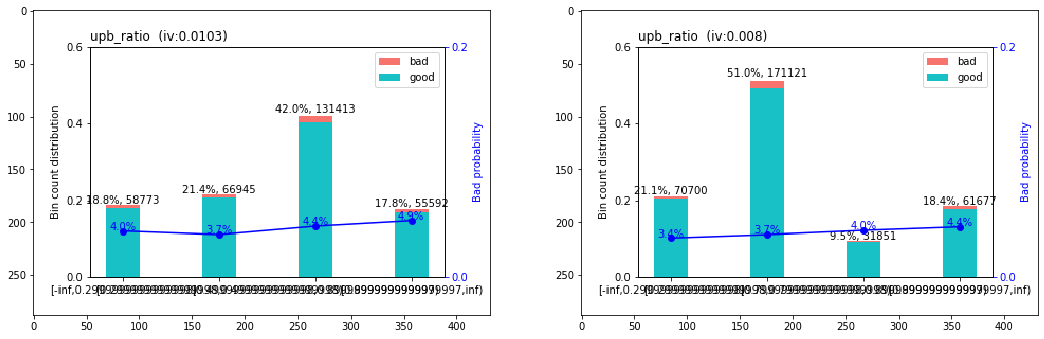

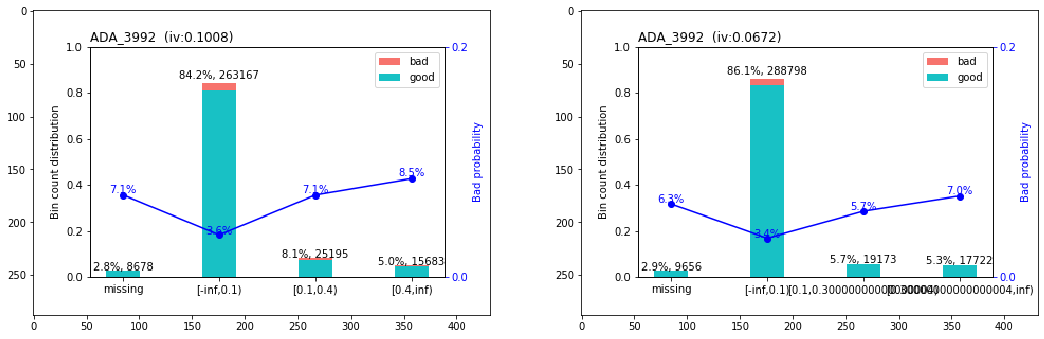

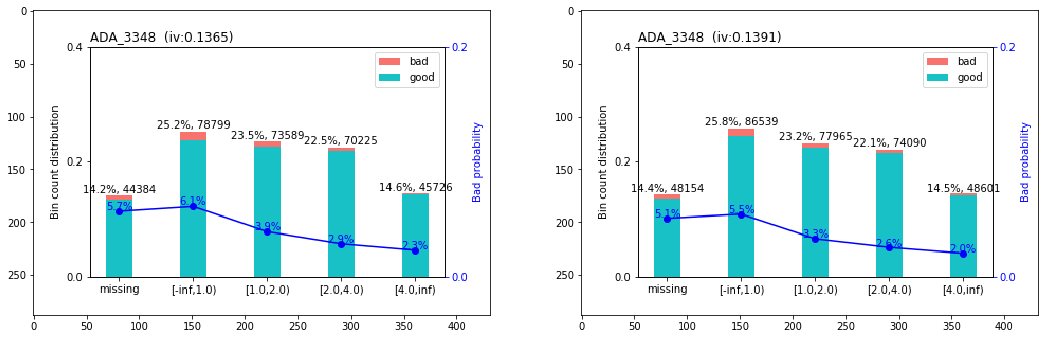

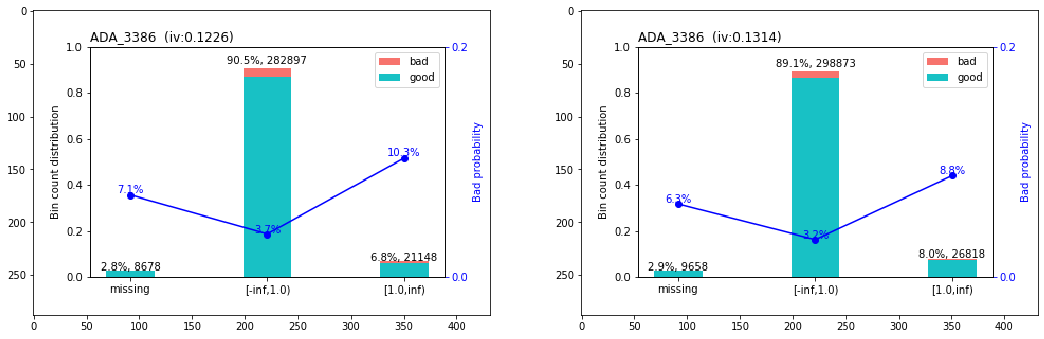

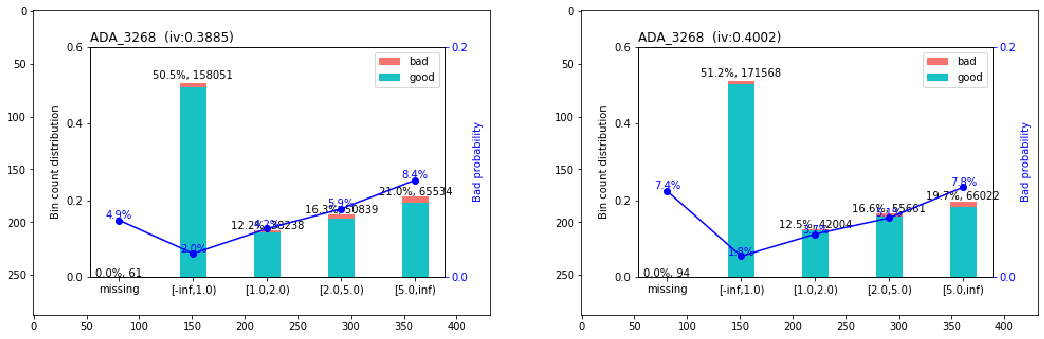

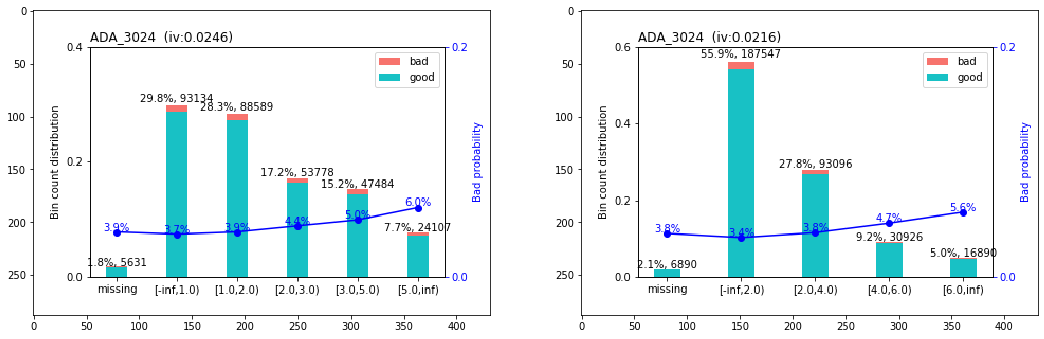

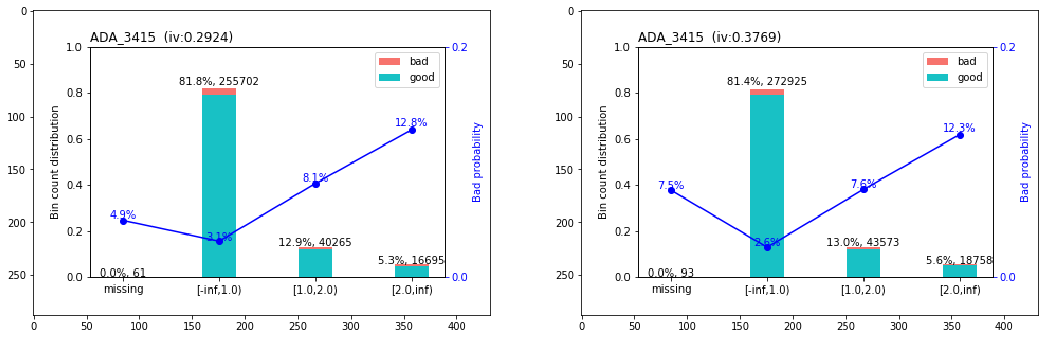

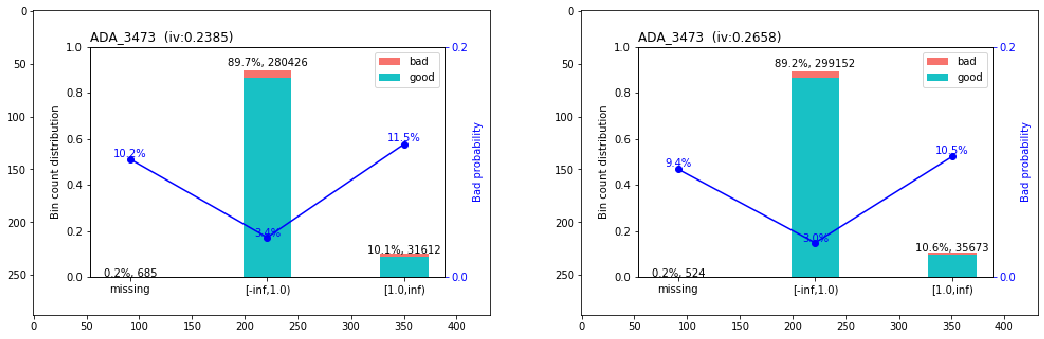

In [27]:
# figure size in inches optional
rcParams['figure.figsize'] = 18 ,15

for key,i in plotlist.items():
    # read images
    img_A = mpimg.imread('/home/ec2-user/SageMaker/propensity_to_pay/slowunsecure/char/' + str(key)+ '.png')
    img_B = mpimg.imread('/home/ec2-user/SageMaker/propensity_to_pay/model_monitor/slowunsecure_char/'+ str(key)+ '.png')

    # display images
    fig, ax = plt.subplots(1,2)
    ax[0].imshow(img_A)
    ax[1].imshow(img_B)

[INFO] creating woe binning ...


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/scorecardpy/condition_fun.py:96: UserWarning: There are NaNs in 'badflag' column. The rows with NaN in 'badflag' were removed from dat.
  warnings.warn("There are NaNs in \'{}\' column. The rows with NaN in \'{}\' were removed from dat.".format(y,y))
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


Binning on 146839 rows and 38 columns in 00:00:23


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/scorecardpy/woebin.py:1203: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax1 = plt.subplots()
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/scorecardpy/woebin.py:1203: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax1 = plt.subplots()
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/scorecardpy/woebin.py:1203: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figu

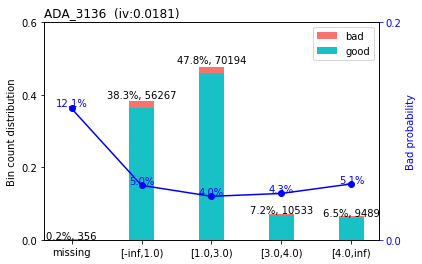

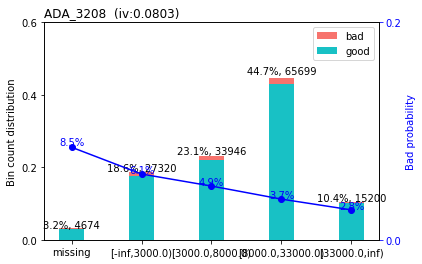

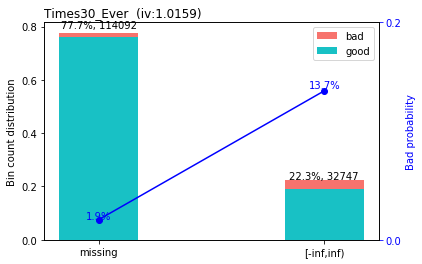

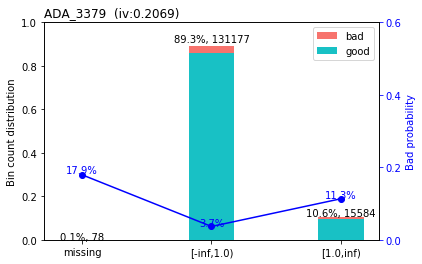

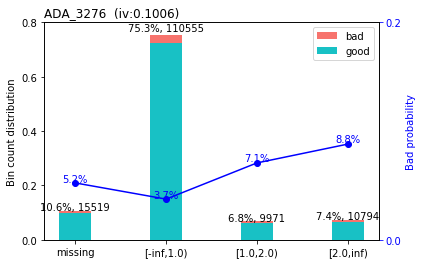

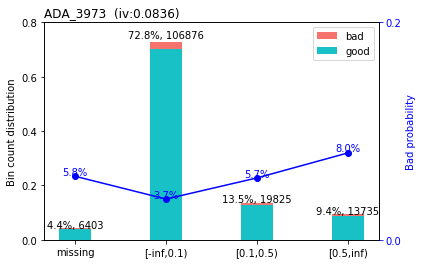

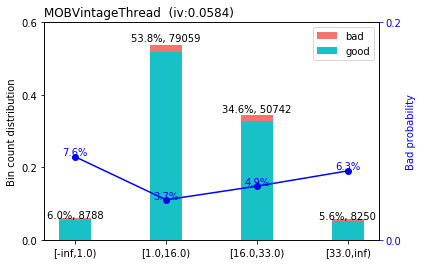

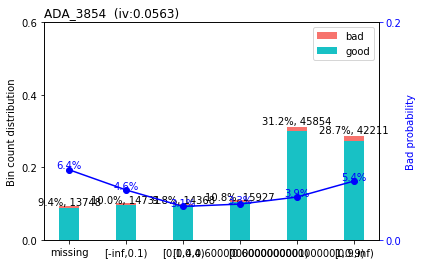

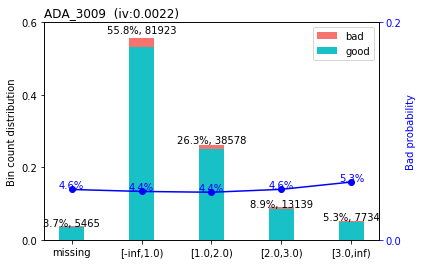

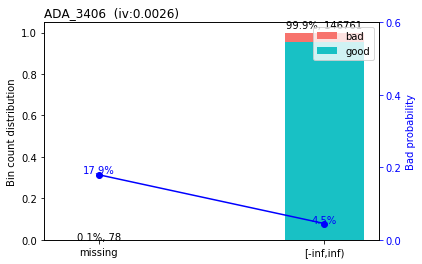

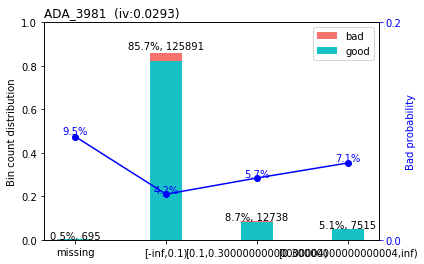

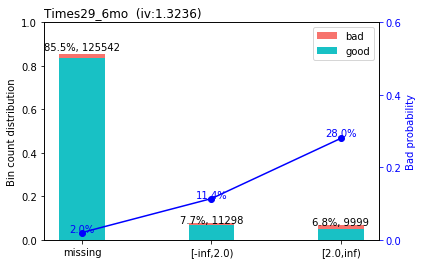

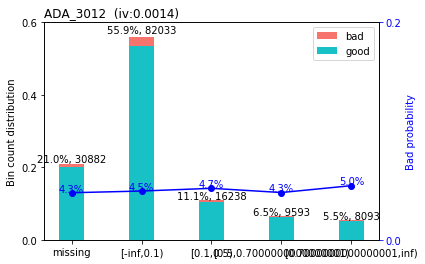

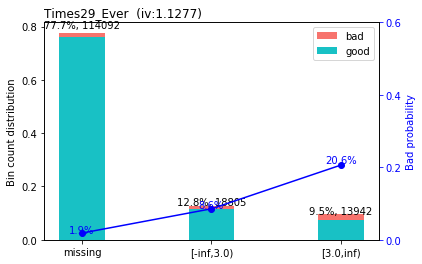

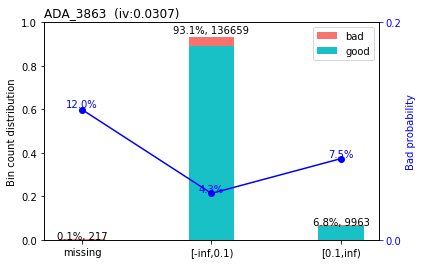

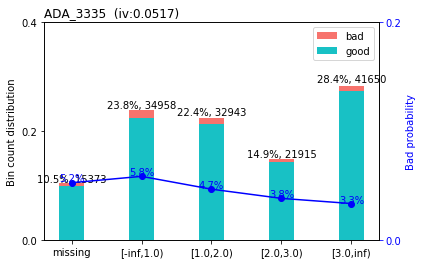

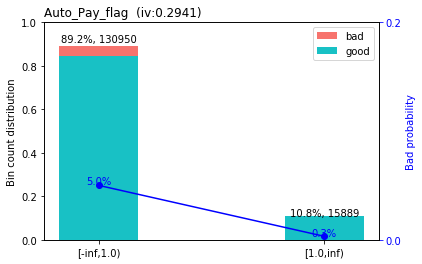

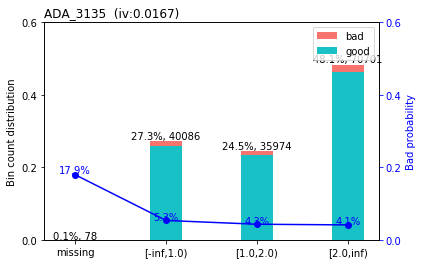

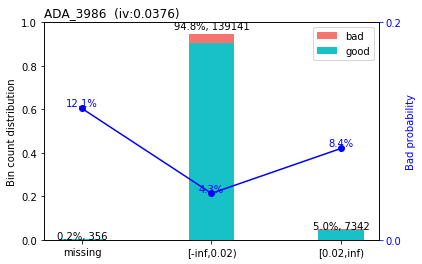

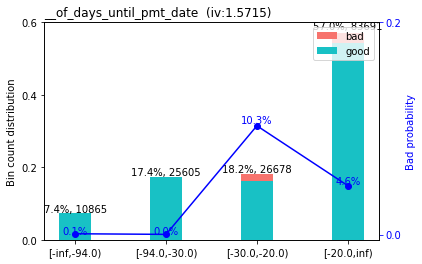

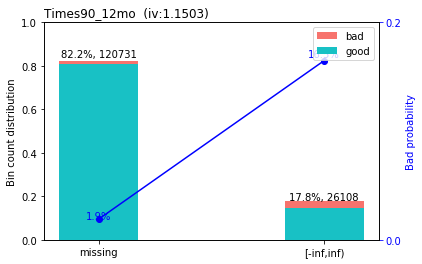

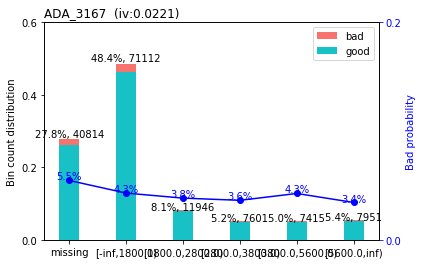

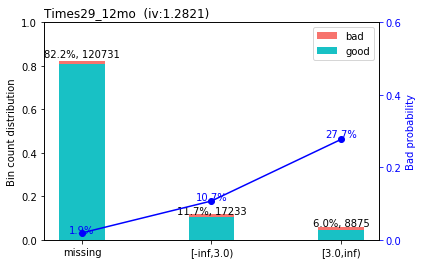

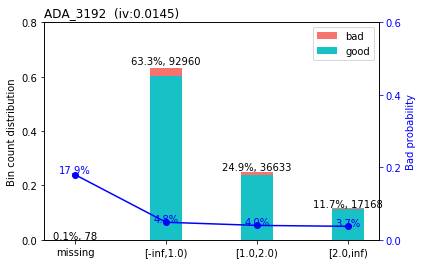

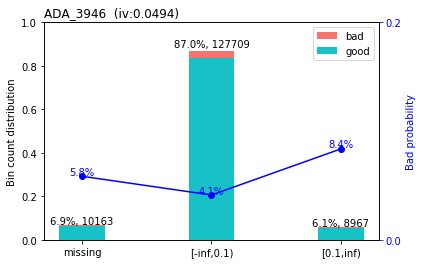

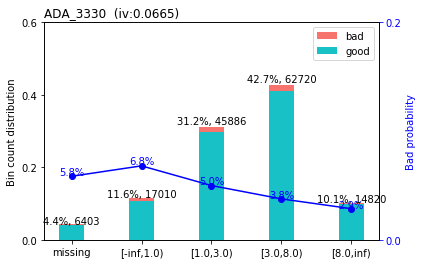

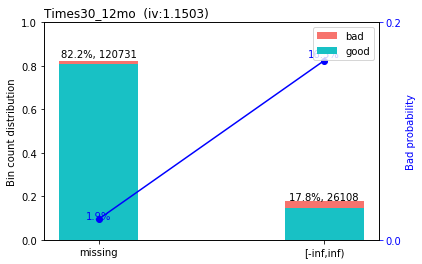

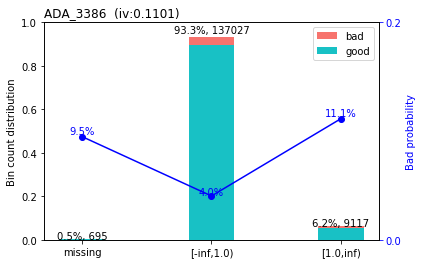

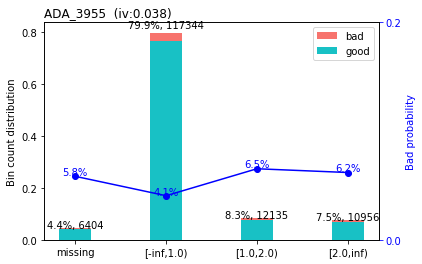

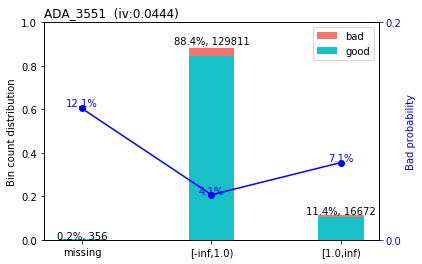

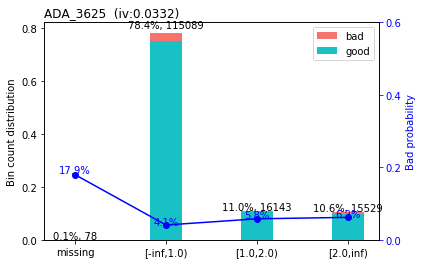

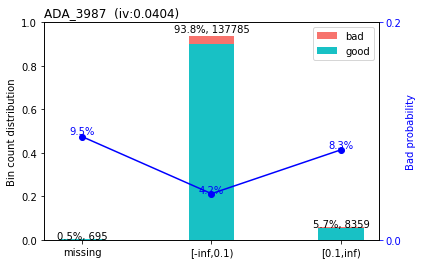

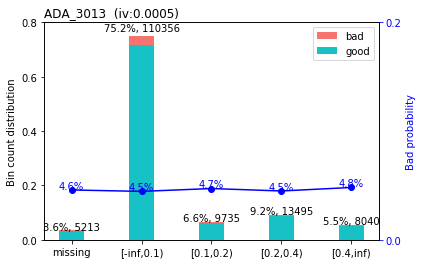

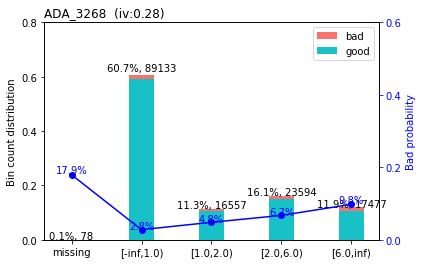

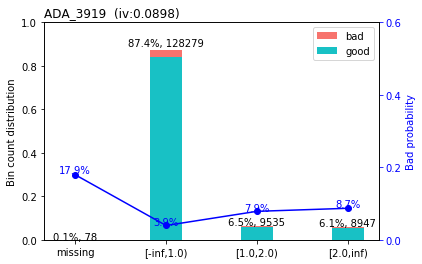

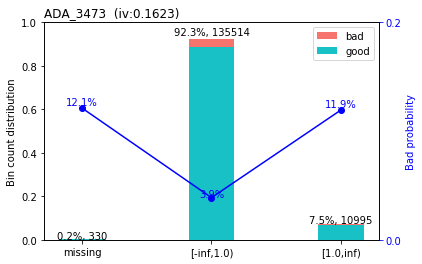

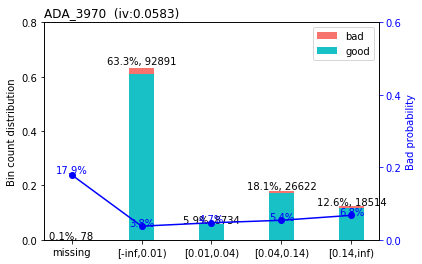

In [28]:
#plot slownoappl and compare with development sample
rcParams['figure.figsize'] = 6.0 ,4.0
bins_adj = sc.woebin(df3, y="badflag")

plotlist=sc.woebin_plot(bins_adj)
for key,i in plotlist.items():
#     plt.show(i)
    i.savefig('/home/ec2-user/SageMaker/propensity_to_pay/model_monitor/slownoappl_char/'+str(key)+'.png')

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


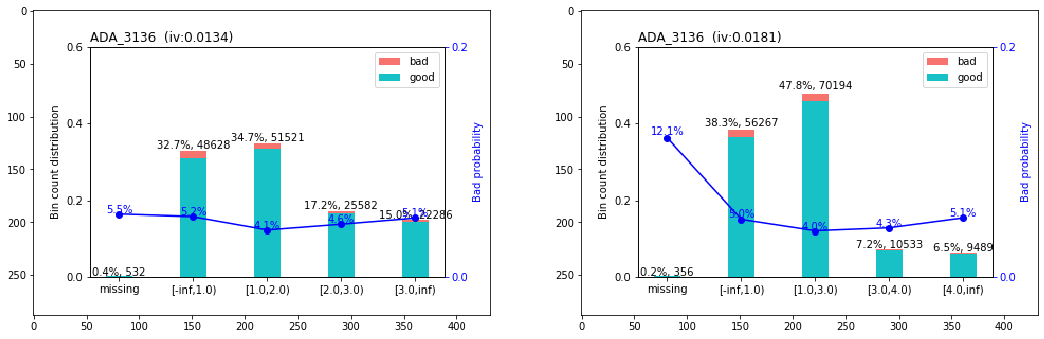

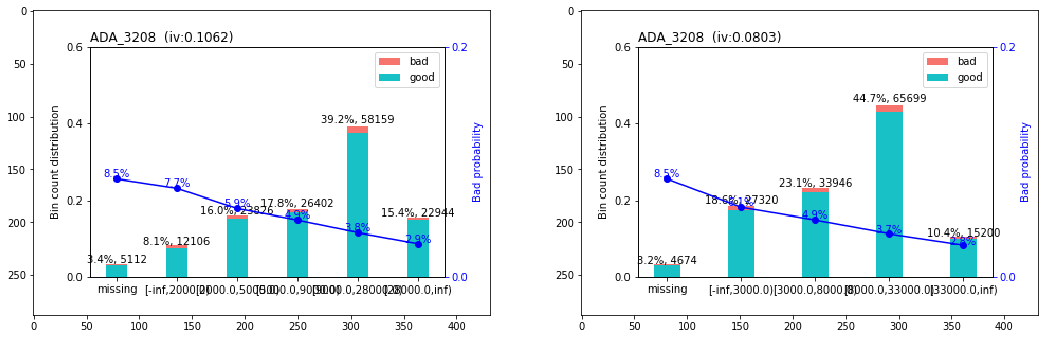

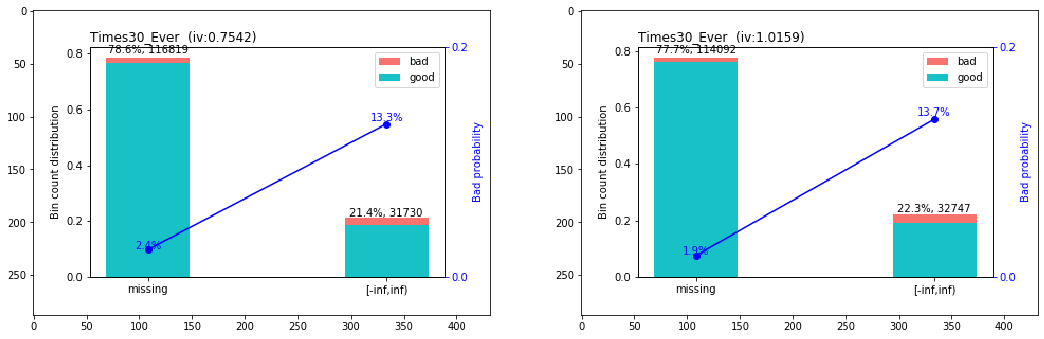

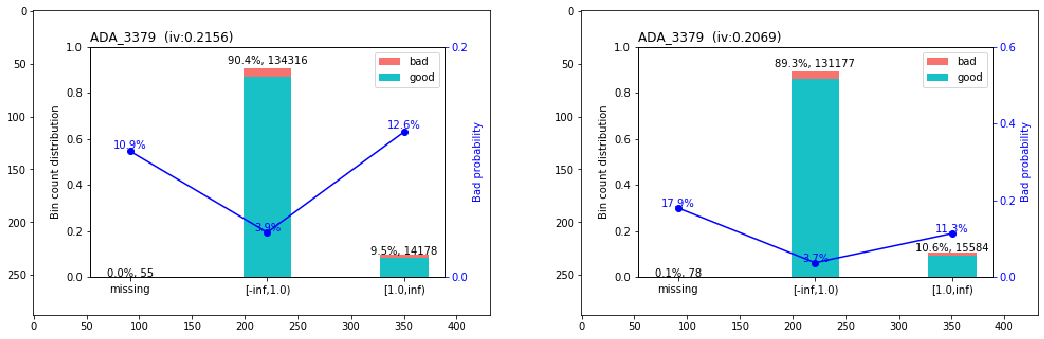

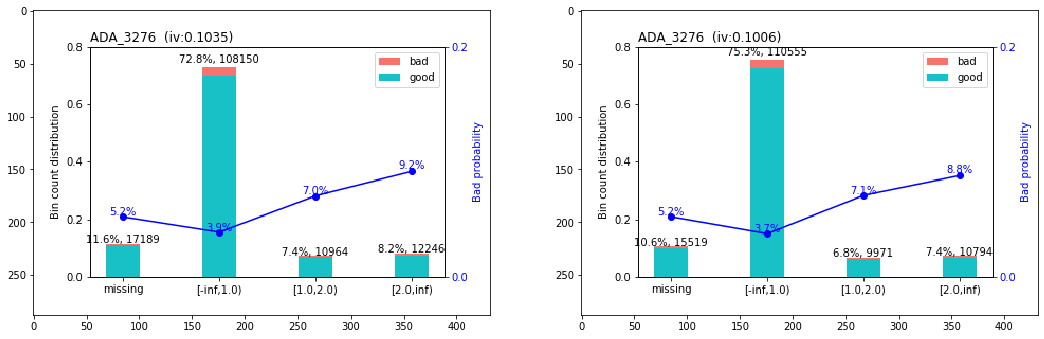

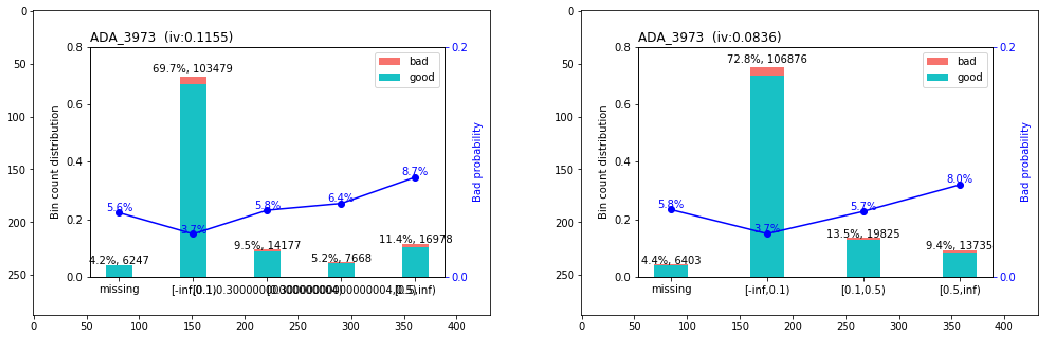

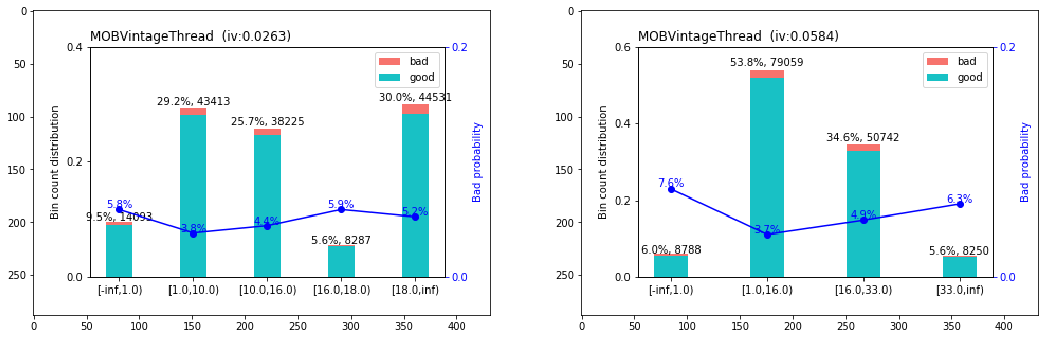

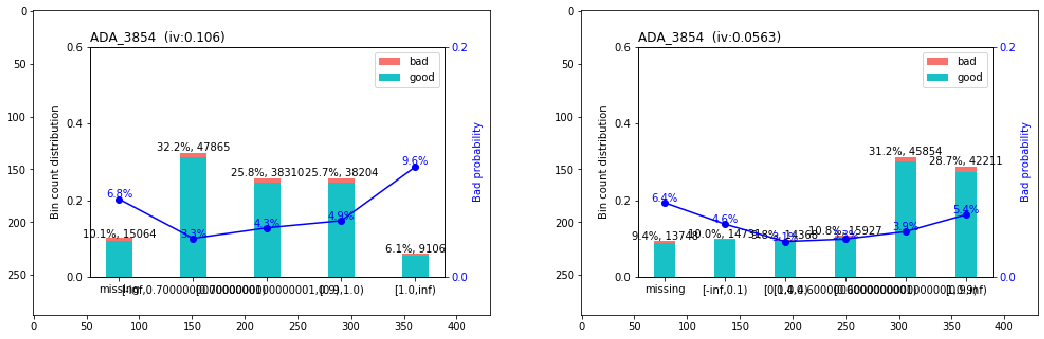

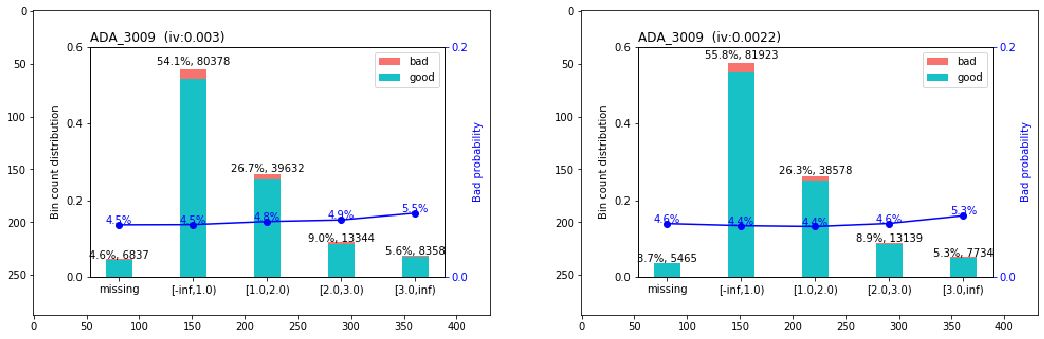

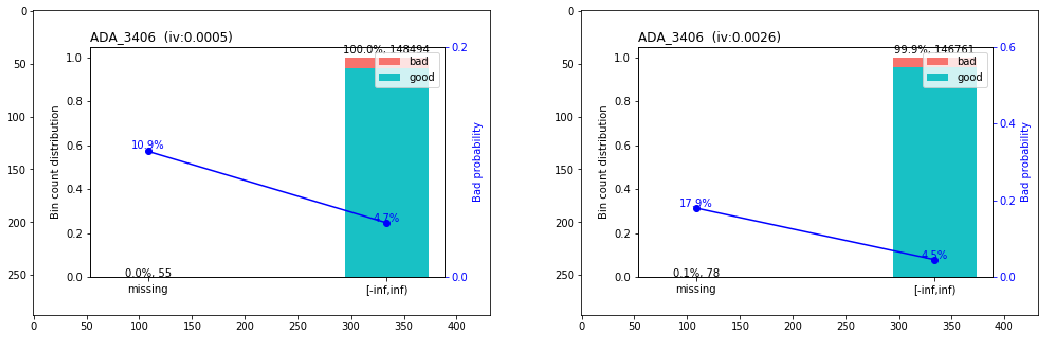

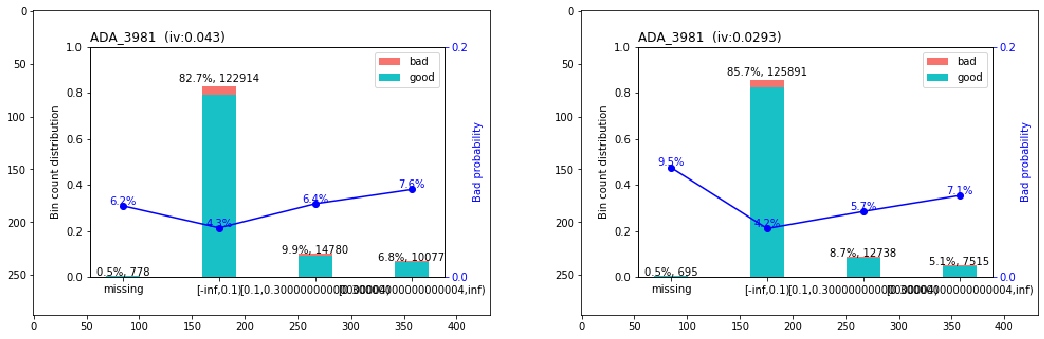

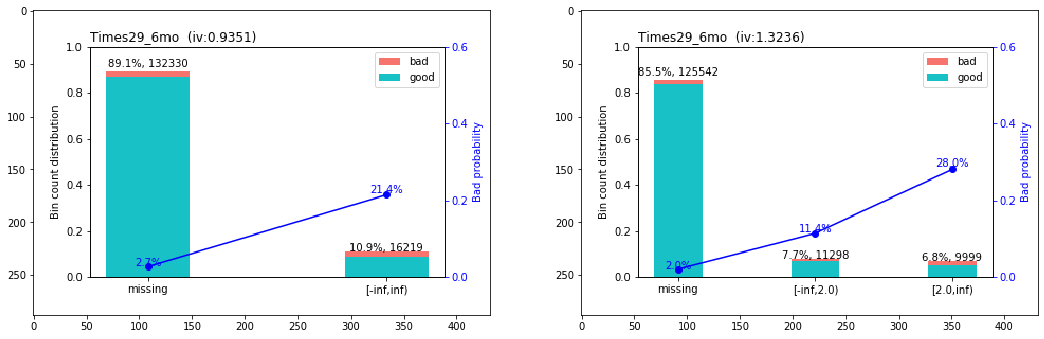

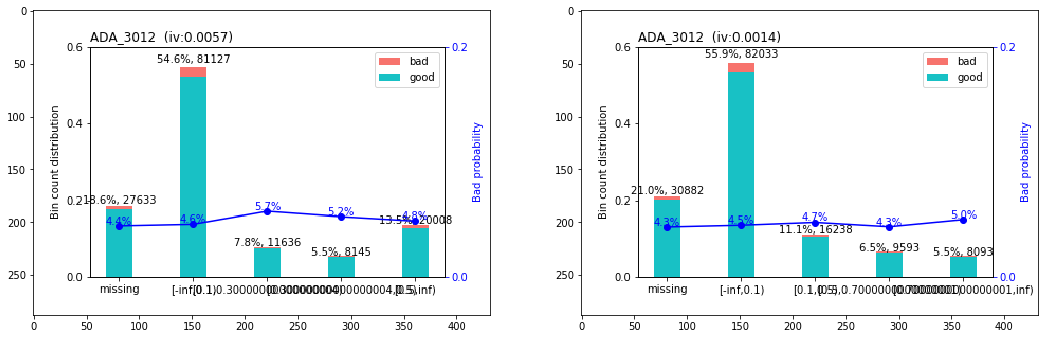

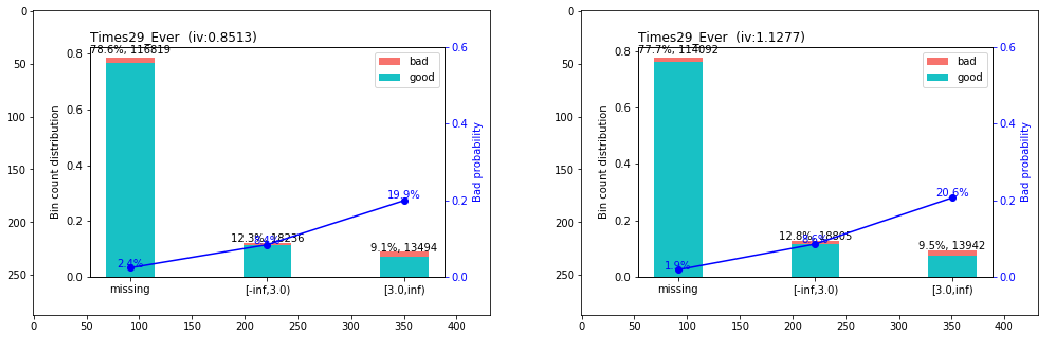

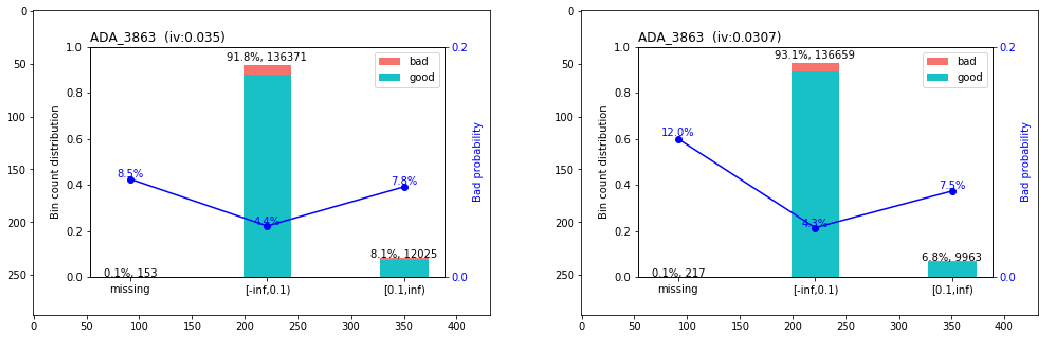

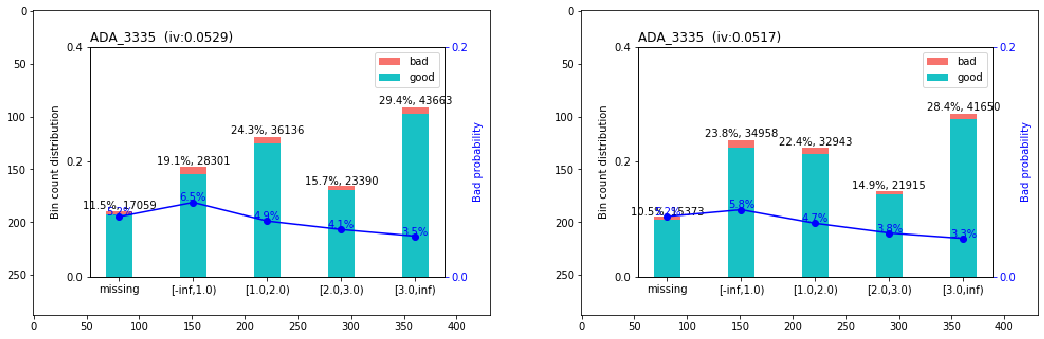

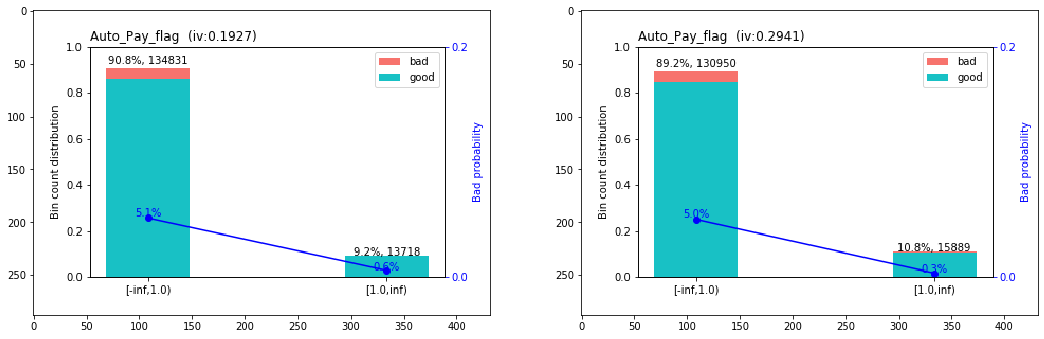

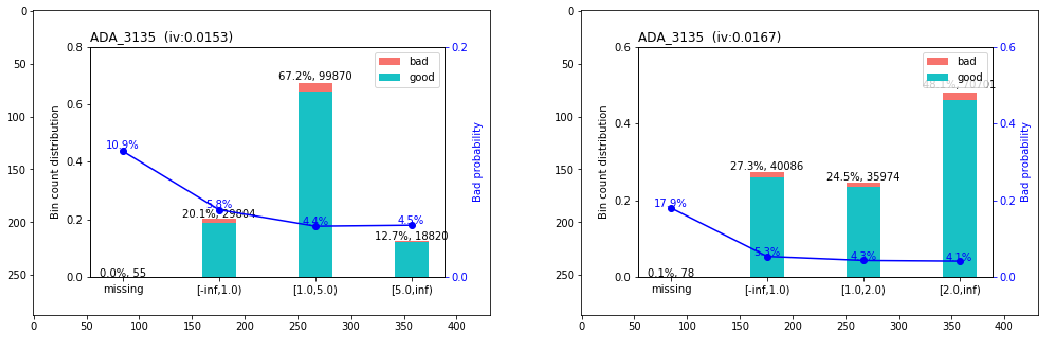

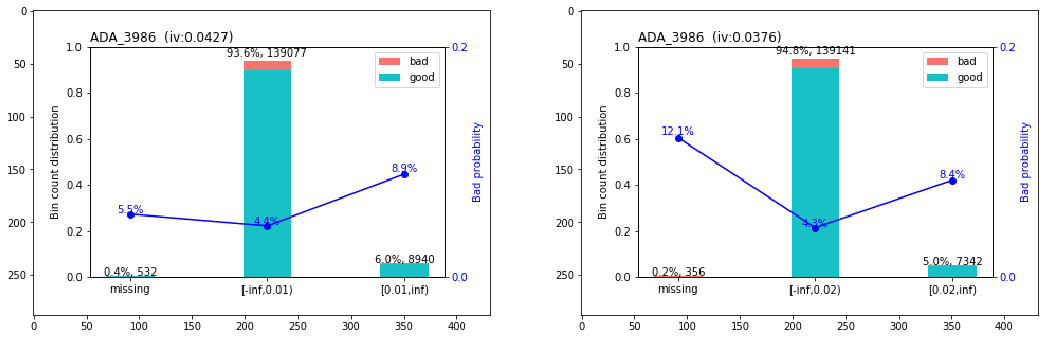

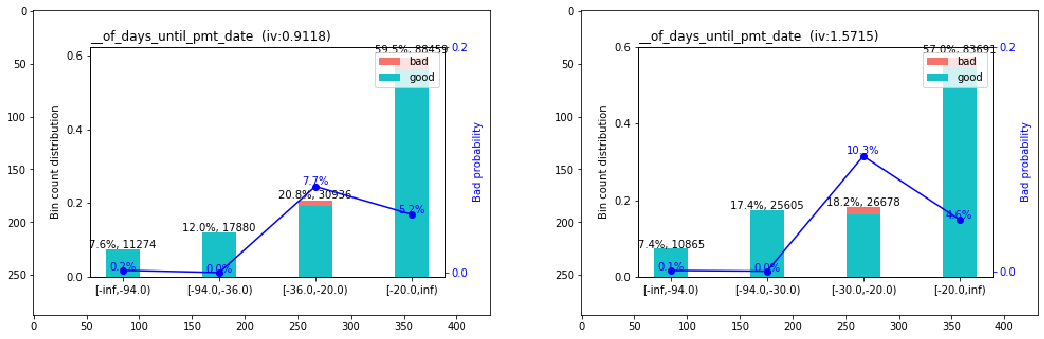

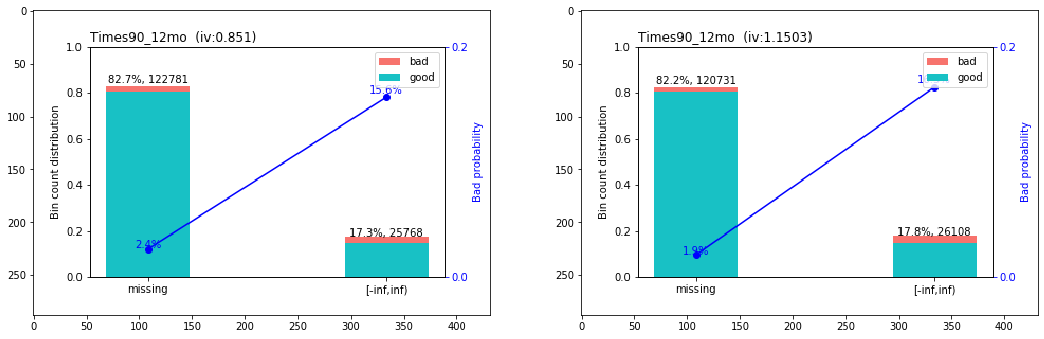

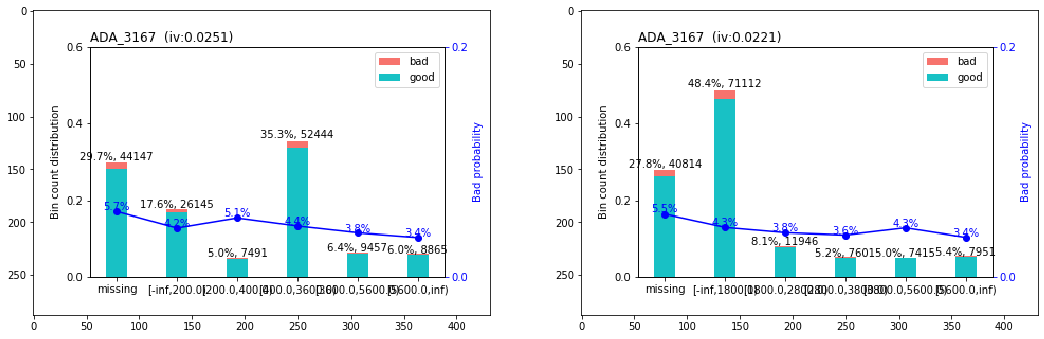

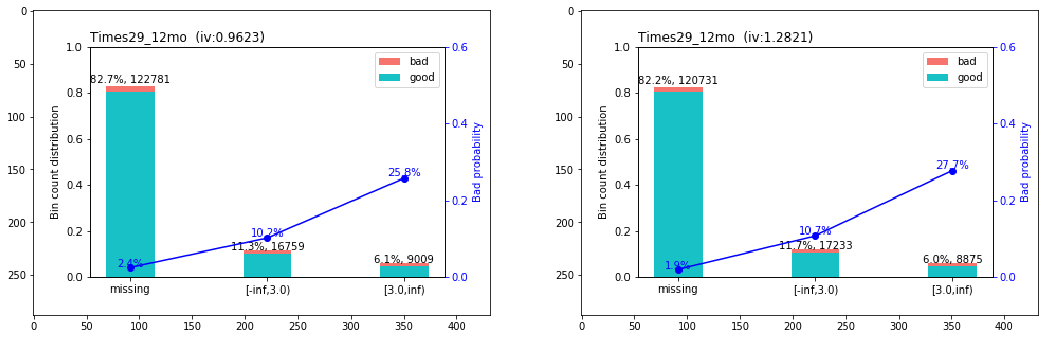

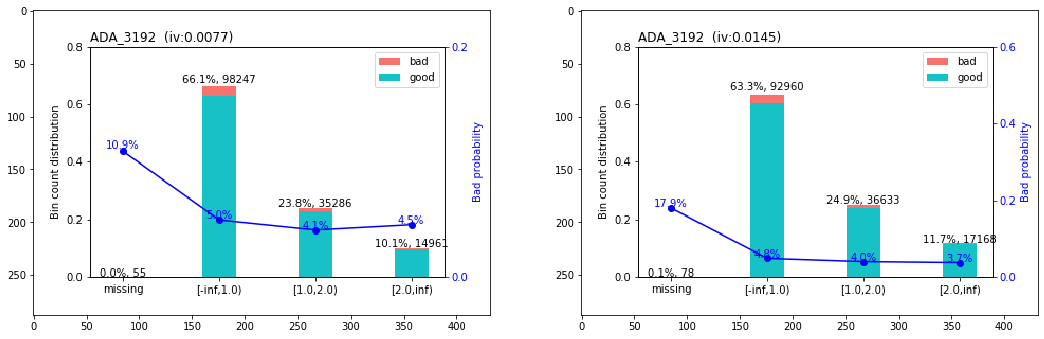

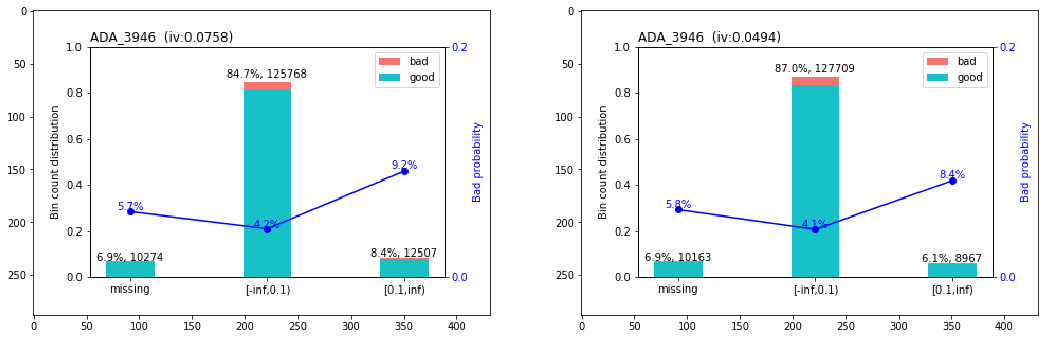

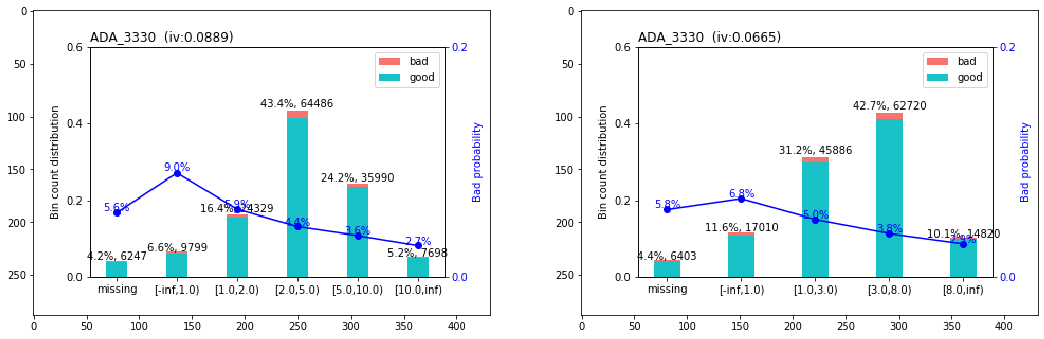

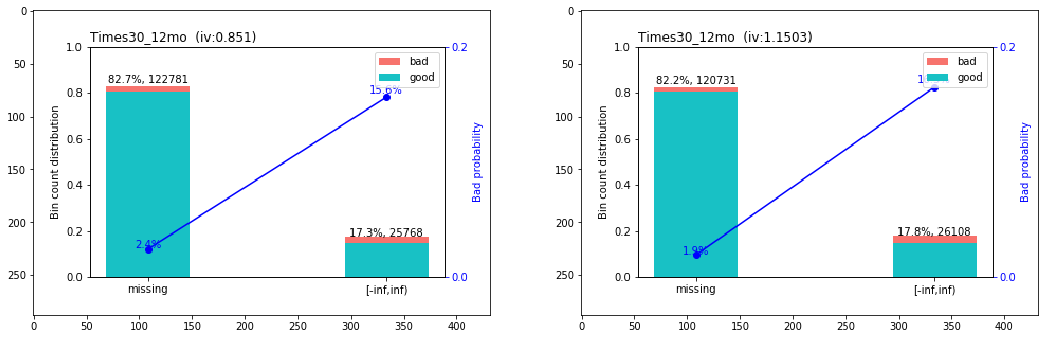

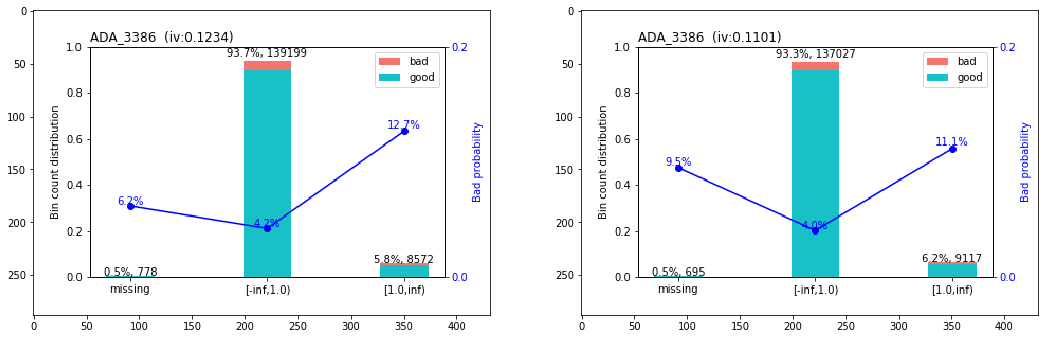

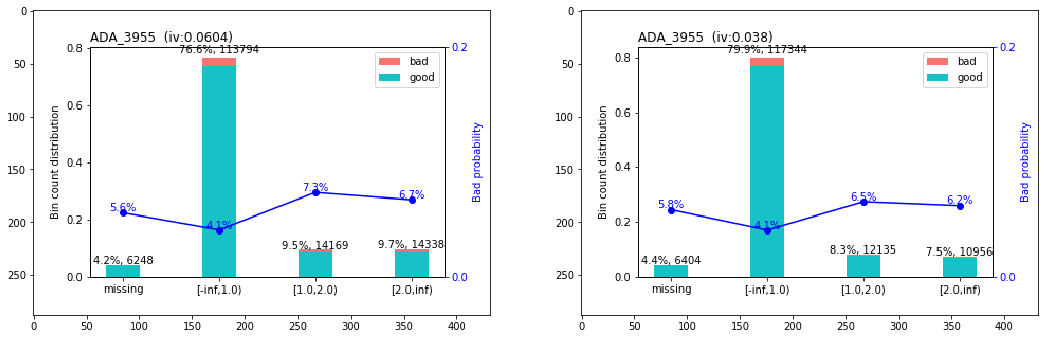

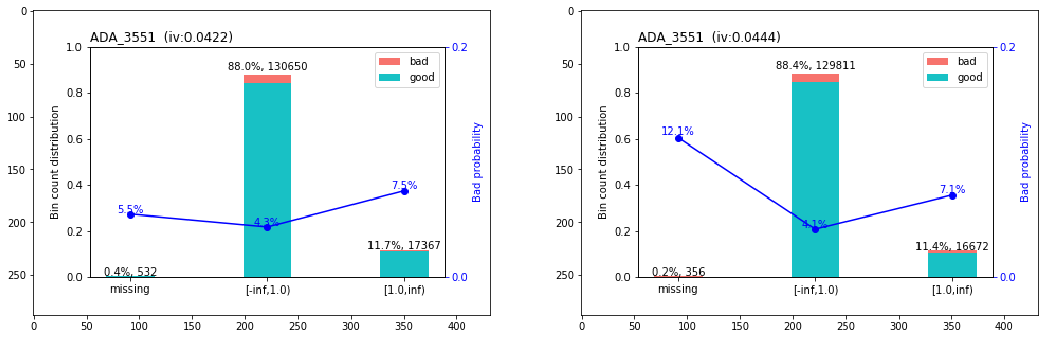

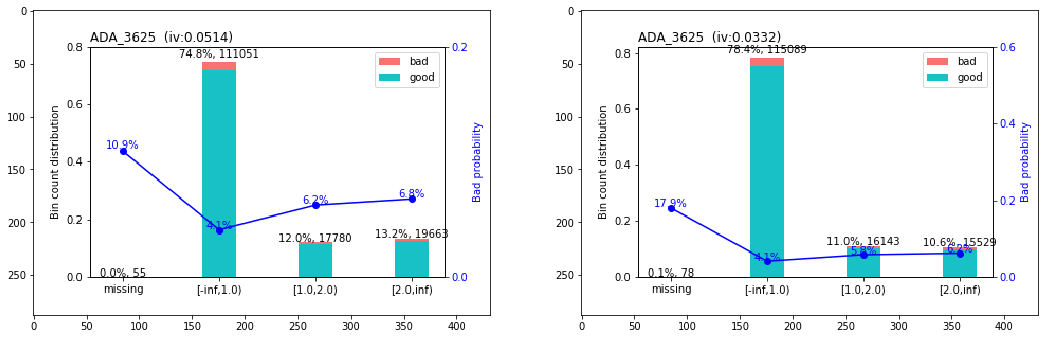

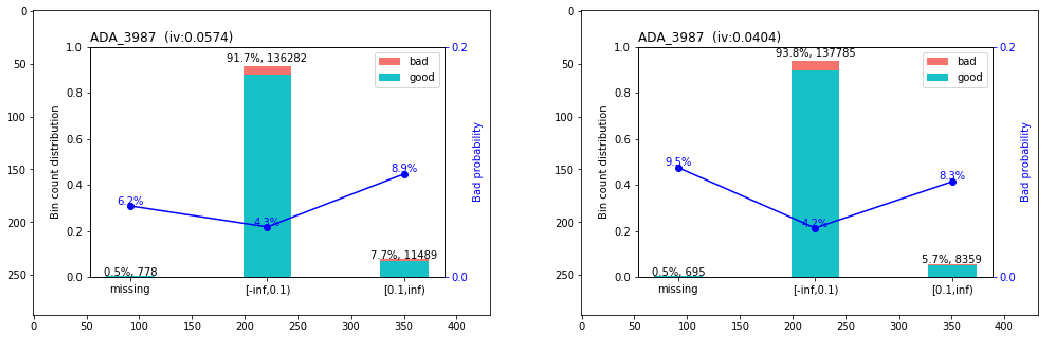

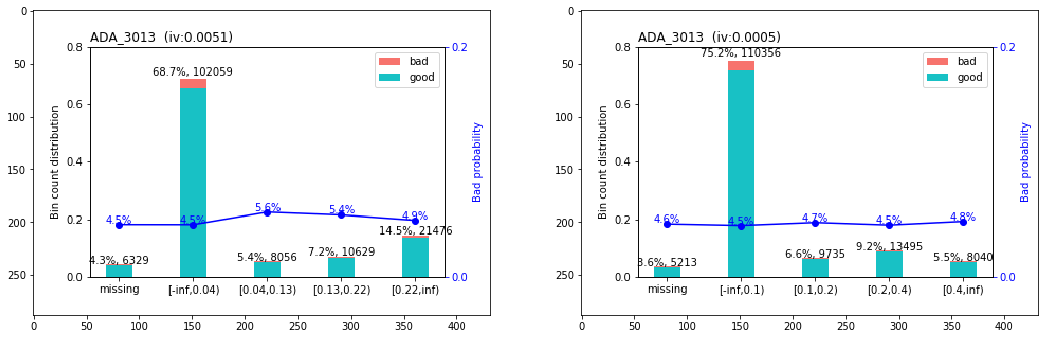

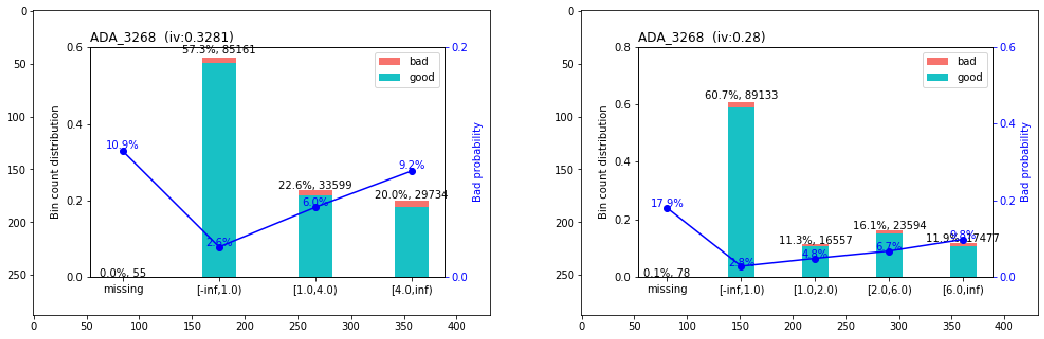

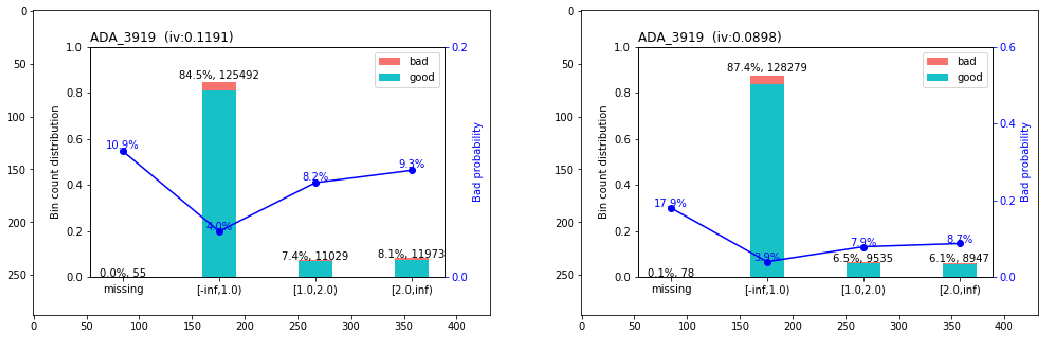

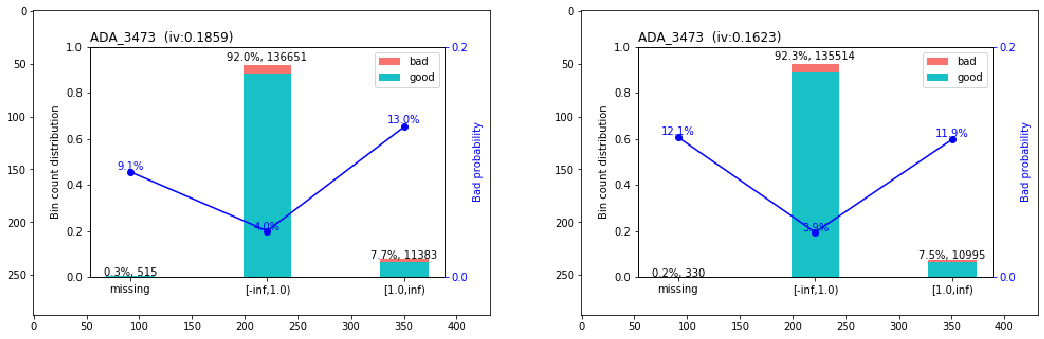

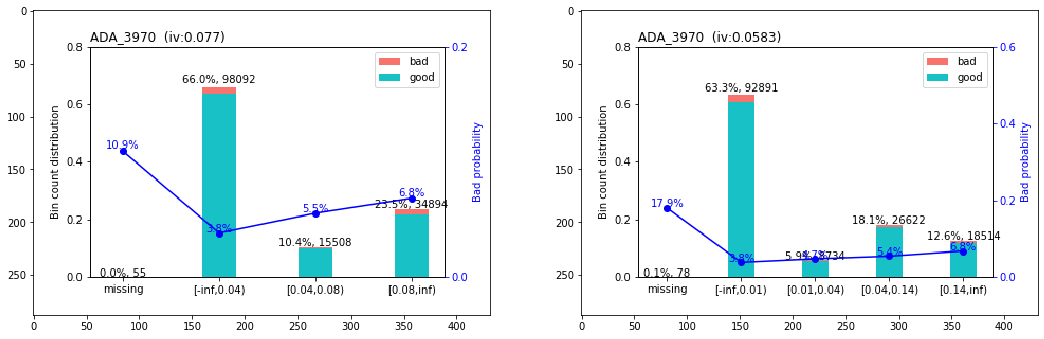

In [29]:
# figure size in inches optional
rcParams['figure.figsize'] = 18 ,15

for key,i in plotlist.items():
    # read images
    img_A = mpimg.imread('/home/ec2-user/SageMaker/propensity_to_pay/slownoappl/char/' + str(key)+ '.png')
    img_B = mpimg.imread('/home/ec2-user/SageMaker/propensity_to_pay/model_monitor/slownoappl_char/'+ str(key)+ '.png')

    # display images
    fig, ax = plt.subplots(1,2)
    ax[0].imshow(img_A)
    ax[1].imshow(img_B)

In [30]:
ptable1=pd.read_csv('../model_monitor/slowsecure_capfloor.csv')
ptable2=pd.read_csv('../model_monitor/slowunsecure_capfloor.csv')
ptable3=pd.read_csv('../model_monitor/slownoappl_capfloor.csv')

In [31]:
y1=df1.loc[: ,'badflag']
X1=df1.loc[: , df1.columns!='badflag']
y2=df2.loc[: ,'badflag']
X2=df2.loc[: , df2.columns!='badflag']
y3=df3.loc[: ,'badflag']
X3=df3.loc[: , df3.columns!='badflag']

In [32]:

impute_secure(X1, ptable1)


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


In [33]:
impute_unsecure(X2, ptable2)


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


In [34]:
impute_noappl(X3, ptable3)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


In [35]:
X1.fillna(0, inplace=True)
X2.fillna(0, inplace=True)
X3.fillna(0, inplace=True)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/pandas/core/frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [36]:
xgb1 = download_model('slowsecure_xgb_model_v2_2')
xgb2 = download_model('slowunsecure_xgb_model_v2_2')
xgb3 = download_model('slownoappl_xgb_model_v2_2')

In [37]:
pred1=xgb1.predict_proba(X1)[:, 1]
pred2=xgb2.predict_proba(X2)[:, 1]
pred3=xgb3.predict_proba(X3)[:, 1]

In [38]:
y_true=pd.concat([y1, y2,y3], sort=False)
y_true.reset_index(drop=True, inplace=True)

In [39]:

y_hat_df1=pd.DataFrame(data=pred1, columns=['Y_hats'], index=X1.index.copy())

y_hat_df2=pd.DataFrame(data=pred2, columns=['Y_hats'], index=X2.index.copy())

y_hat_df3=pd.DataFrame(data=pred3, columns=['Y_hats'], index=X3.index.copy())

In [40]:

y_hat=pd.concat([y_hat_df1, y_hat_df2,y_hat_df3], sort=False)
y_hat.reset_index(drop=True, inplace=True)
y_hat.describe()

Y_hats
count  544323.000000
mean        0.053041
std         0.095662
min         0.000019
25%         0.004629
50%         0.018114
75%         0.047239
max         0.847082

In [41]:

df_out=pd.merge(y_true, y_hat, how='left', left_index=True, right_index=True)
ks_out=ks(data=df_out, target='badflag', prob='Y_hats')

      min_score    max_score   events  nonevents     total event_rate  \
0      0.152128     0.847082  13013.0    41420.0   54433.0     23.91%   
1     0.0636011     0.152119   3805.0    50627.0   54432.0      6.99%   
2     0.0372403    0.0635987   1802.0    52630.0   54432.0      3.31%   
3     0.0253204    0.0372397   1192.0    53240.0   54432.0      2.19%   
4     0.0181147    0.0253201    830.0    53602.0   54432.0      1.52%   
5     0.0126281    0.0181142    584.0    53849.0   54433.0      1.07%   
6    0.00743586     0.012628    386.0    54046.0   54432.0      0.71%   
7    0.00249836   0.00743573    136.0    54293.0   54429.0      0.25%   
8   0.000297783   0.00249819     29.0    54406.0   54435.0      0.05%   
9   1.92464e-05  0.000297777      1.0    54431.0   54432.0      0.00%   
10                            21778.0   522544.0  544322.0      4.00%   

   nonevent_rate % events % nonevents % cum_events % cum_nonevents    KS  
0         76.09%   59.75%       7.93%       59.7

In [42]:

upload_file(ks_out,'slow_xgb_ks.xlsx')


In [43]:
slows_base=pd.read_csv('slowsbaseline_xgb_v2_2.csv')
slows_base.describe()


badflag         Y_hats        target0
count  175648.000000  175648.000000  175648.000000
mean        0.045853       0.045994       0.954147
std         0.209167       0.081010       0.209167
min         0.000000       0.000016       0.000000
25%         0.000000       0.004463       1.000000
50%         0.000000       0.018412       1.000000
75%         0.000000       0.044540       1.000000
max         1.000000       0.857533       1.000000

In [44]:
#calculate PSI for score;
import math
slows_psi_out=psi(slows_base["Y_hats"].tolist(), y_hat["Y_hats"].tolist(), group=10)


   lowercut  uppercut  ben_cnt   ben_pct  comp_cnt  comp_pct  pct_diff  \
0  0.000016  0.000280  17565.0  0.100001   51801.0  0.095166  0.004835   
1  0.000280  0.002013  17565.0  0.100001   49982.0  0.091824  0.008177   
2  0.002013  0.007775  17565.0  0.100001   64579.0  0.118641 -0.018640   
3  0.007775  0.013157  17565.0  0.100001   57040.0  0.104791 -0.004790   
4  0.013158  0.018412  17565.0  0.100001   51443.0  0.094508  0.005493   
5  0.018412  0.025129  17565.0  0.100001   50570.0  0.092904  0.007097   
6  0.025130  0.035902  17565.0  0.100001   50926.0  0.093558  0.006443   
7  0.035903  0.057528  17565.0  0.100001   50762.0  0.093257  0.006744   
8  0.057514  0.118430  17564.0  0.099995   50547.0  0.092862  0.007133   
9  0.118441  0.857533  17564.0  0.099995   66675.0  0.122492 -0.022496   

   info_odds       psi  
0   0.049560  0.000240  
1   0.085306  0.000698  
2  -0.170920  0.003186  
3  -0.046784  0.000224  
4   0.056495  0.000310  
5   0.073611  0.000522  
6   0.0665

In [45]:
upload_file(slows_psi_out,'slows_xgb_psi.xlsx')



In [46]:
!rm slownoappl_xgb_model_v2_2
!rm slowsecure_xgb_model_v2_2
!rm slowunsecure_xgb_model_v2_2

In [47]:
#compile a list of model variables for the pps model
varlist=['MOBVintageUnthread', '__of_days_until_pmt_date', 'Times29_6mo',
       'Times29_12mo', 'Times29_Ever', 'Times60_Ever', 'Times90_Ever',
       'ADA_3368', 'ADA_3863', 'ADA_3842', 'ADA_3117', 'ADA_3547', 'ADA_3854',
       'ADA_3367', 'ADA_3379', 'ADA_3474', 'ADA_3535', 'ADA_3614', 'ADA_3755',
       'ADA_3273', 'ADA_3540', 'ADA_3757', 'ADA_3761', 'ADA_3011', 'ADA_3026',
       'ADA_3580', 'ADA_3208', 'ADA_3235', 'ADA_3347', 'ADA_3366', 'ADA_3612',
       'ADA_3852', 'ADA_3856', 'ADA_3901', 'ADA_3144', 'ADA_3422',
       'Fixed_Income', 'Hourly_Income', 'Auto_Pay_flag','MOBVintageUnthread', '__of_days_until_pmt_date', 'Times29_6mo',
       'Times30_9mo', 'Times29_12mo', 'Times29_Ever', 'Times30_Ever',
       'Times60_Ever', 'Times90_Ever', 'ADA_3217', 'ADA_3239', 'ADA_3370',
       'ADA_3854', 'ADA_3268', 'ADA_3379', 'ADA_3415', 'ADA_3473', 'ADA_3805',
       'ADA_3843', 'ADA_3844', 'ADA_3273', 'ADA_3926', 'ADA_3010', 'ADA_3020',
       'ADA_3024', 'ADA_3348', 'ADA_3373', 'ADA_3841', 'ADA_3208', 'ADA_3386',
       'ADA_3915', 'ADA_3979', 'ADA_3992', 'ADA_3422', 'Fixed_Income',
       'Auto_Pay_flag', 'CreditKumar', 'upb_ratio','MOBVintageThread', '__of_days_until_pmt_date', 'Times29_6mo',
       'Times29_12mo', 'Times30_12mo', 'Times90_12mo', 'Times29_Ever',
       'Times30_Ever', 'ADA_3863', 'ADA_3330', 'ADA_3854', 'ADA_3946',
       'ADA_3955', 'ADA_3973', 'ADA_3135', 'ADA_3192', 'ADA_3268', 'ADA_3379',
       'ADA_3406', 'ADA_3473', 'ADA_3625', 'ADA_3919', 'ADA_3970', 'ADA_3136',
       'ADA_3551', 'ADA_3986', 'ADA_3009', 'ADA_3012', 'ADA_3013', 'ADA_3167',
       'ADA_3276', 'ADA_3335', 'ADA_3208', 'ADA_3386', 'ADA_3981', 'ADA_3987',
       'Auto_Pay_flag','Loan_Type', 'Original_PI_Constant', 'number_of_prior_loans',
       'MOBVintageUnthread', 'MOBVintageThread', 'yrs_on_job_dbl',
       '__of_days_until_pmt_date', 'FICO_migration', 'NumberOfCars',
       'MaxCarValue', 'MincarMile', 'Times30_6mo', 'Times30_9mo',
       'Times29_12mo', 'Times30_Ever', 'Times60_Ever', 'Times90_Ever',
       'ADA_3368', 'ADA_3101', 'ADA_3161', 'ADA_3288', 'ADA_3471', 'ADA_3473',
       'ADA_3474', 'ADA_3535', 'ADA_3759', 'ADA_3804', 'ADA_3805', 'ADA_3950',
       'ADA_3983', 'ADA_3105', 'ADA_3116', 'ADA_3540', 'ADA_3879', 'ADA_3979',
       'ADA_3144', 'Homeowner', 'FPD_n', 'PB', 'Coborrower', 'acflnps_n',
       'state_risk','number_of_prior_loans', 'MOBVintageThread', 'FICO_migration',
       'NumberOfCars', 'MaxCarValue', 'Times29_6mo', 'Times30_6mo',
       'Times60_9mo', 'Times29_Ever', 'Times60_Ever', 'ADA_3117', 'ADA_3417',
       'ADA_3860', 'ADA_3939', 'ADA_3977', 'ADA_3550', 'ADA_3474', 'ADA_3475',
       'ADA_3759', 'ADA_3804', 'ADA_3952', 'ADA_3988', 'ADA_3231', 'ADA_3273',
       'ADA_3540', 'ADA_3868', 'ADA_3880', 'ADA_3926', 'ADA_3195', 'ADA_3931',
       'ADA_3374', 'ADA_3386', 'ADA_3762', 'ADA_3869', 'ADA_3144', 'ADA_3850',
       'state_risk','MOBVintageThread', 'MaxCarYear', 'SumCarValue', 'Times29_6mo',
       'Times30_6mo', 'Times29_Ever', 'Times60_Ever', 'ADA_3236', 'ADA_3217',
       'ADA_3320', 'ADA_3897', 'ADA_3946', 'ADA_3311', 'ADA_3475', 'ADA_3759',
       'ADA_3804', 'ADA_3832', 'ADA_3865', 'ADA_3902', 'ADA_3983', 'ADA_3164',
       'ADA_3273', 'ADA_3761', 'ADA_3891', 'ADA_3928', 'ADA_3959', 'ADA_3991',
       'ADA_3353', 'ADA_3545', 'ADA_3611', 'ADA_3235', 'ADA_3395', 'ADA_3751',
       'ADA_3979', 'ADA_3987', 'ADA_3850']

In [48]:
import pandas as pd
myFinalList = pd.unique(varlist).tolist()
print(myFinalList)

['MOBVintageUnthread', '__of_days_until_pmt_date', 'Times29_6mo', 'Times29_12mo', 'Times29_Ever', 'Times60_Ever', 'Times90_Ever', 'ADA_3368', 'ADA_3863', 'ADA_3842', 'ADA_3117', 'ADA_3547', 'ADA_3854', 'ADA_3367', 'ADA_3379', 'ADA_3474', 'ADA_3535', 'ADA_3614', 'ADA_3755', 'ADA_3273', 'ADA_3540', 'ADA_3757', 'ADA_3761', 'ADA_3011', 'ADA_3026', 'ADA_3580', 'ADA_3208', 'ADA_3235', 'ADA_3347', 'ADA_3366', 'ADA_3612', 'ADA_3852', 'ADA_3856', 'ADA_3901', 'ADA_3144', 'ADA_3422', 'Fixed_Income', 'Hourly_Income', 'Auto_Pay_flag', 'Times30_9mo', 'Times30_Ever', 'ADA_3217', 'ADA_3239', 'ADA_3370', 'ADA_3268', 'ADA_3415', 'ADA_3473', 'ADA_3805', 'ADA_3843', 'ADA_3844', 'ADA_3926', 'ADA_3010', 'ADA_3020', 'ADA_3024', 'ADA_3348', 'ADA_3373', 'ADA_3841', 'ADA_3386', 'ADA_3915', 'ADA_3979', 'ADA_3992', 'CreditKumar', 'upb_ratio', 'MOBVintageThread', 'Times30_12mo', 'Times90_12mo', 'ADA_3330', 'ADA_3946', 'ADA_3955', 'ADA_3973', 'ADA_3135', 'ADA_3192', 'ADA_3406', 'ADA_3625', 'ADA_3919', 'ADA_3970', '

In [49]:
len(myFinalList)

150